<a id='top'></a>

# Webscraping and Advanced Analysis of Data from FBref and TransferMarkt
##### Notebook on how to scrape raw data using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [FBref.com](https://fbref.com/en/) provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/) , and join the datasets through [RecordLinkage](https://pypi.org/project/recordlinkage/) to create one, unified source of information, that can be used for for further analysis of players statistics and financial valuations.

### By [Edd Webster](https://www.twitter.com/eddwebster)
Last updated: 28/08/2020

![title](img/plymouth_badge.jpg)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook is a short Exploratory Data Analysis (EDA) of scraped football statistics data from [FBref.com](https://fbref.com/en/), provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/), using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping, [RecordLinkage](https://pypi.org/project/recordlinkage/) to join the fuzzy data sets, and [matplotlib](https://matplotlib.org/) to create custom visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](img/fifa20eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/fifa-league) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/fifa-league/blob/master/FIFA%2020%20Fantasy%20Football%20League%20using%20TransferMarkt%20Player%20Valuations.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [FBref](#section3.2)<br>
            1.    [Teams](#section3.2.1)<br>
                  1.    [Data Dictionary](#section3.2.1.1)<br>
                  2.    [Creating the DataFrame](#section3.2.1.2)<br>
                  3.    [Initial Data Handling](#section3.2.1.3)<br>
                  4.    [Export the Raw DataFrame](#section3.2.1.4)<br>
            2.    [Outfielder Players](#section3.2)<br>
                  1.    [Data Dictionary](#section3.2.2.1)<br>
                  2.    [Creating the DataFrame](#section3.2.2.2)<br>
                  3.    [Initial Data Handling](#section3.2.2.3)<br>
                  4.    [Export the Raw DataFrame](#section3.2.2.4)<br>
            3.    [Goalkeepers](#section3.2.3)<br>
                  1.    [Data Dictionary](#section3.2.3.1)<br>
                  2.    [Creating the DataFrame](#section3.2.3.2)<br>
                  3.    [Initial Data Handling](#section3.2.3.3)<br>
                  4.    [Export the Raw DataFrame](#section3.2.3.4)<br>
      2.    [TransferMarkt](#section3.3)<br>
            1.    [Teams](#section3.3.1)<br>
                  1.    [Data Dictionary](#section3.3.1.1)<br>
                  2.    [Creating the DataFrame](#section3.3.1.2)<br>
                  3.    [Initial Data Handling](#section3.3.1.3)<br>
                  4.    [Export the Raw DataFrame](#section3.3.1.4)<br>
            2.    [Players](#section3.2)<br>
                   1.    [Data Dictionary](#section3.3.2.1)<br>
                   2.    [Creating the DataFrame](#section3.3.2.2)<br>
                   3.    [Initial Data Handling](#section3.3.2.3)<br>
                   4.    [Export the Raw DataFrame](#section3.3.2.4)<br>            
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [FBref](#section4.2)<br>
            1.    [Teams](#section4.2.1)<br>
                  1.    [Columns of Interest](#section4.2.1.1)<br>
                  2.    [String Cleaning](#section4.2.1.2)<br>
                  3.    [Converting Data Types](#section4.2.1.3)<br>
                  4.    [Export the Engineered DataFrame](#section4.2.1.4)<br>
            2.    [Outfielder Players](#section4.2.2)<br>
                  1.    [Columns of Interest](#section4.2.2.1)<br>
                  2.    [String Cleaning](#section4.2.2.2)<br>
                  3.    [Converting Data Types](#section4.2.2.3)<br>
                  4.    [Export the Engineered DataFrame](#section4.2.2.4)<br>
            3.    [Goalkeepers](#section4.2.3)<br>
                  1.    [Columns of Interest](#section4.2.3.1)<br>
                  2.    [String Cleaning](#section4.2.3.2)<br>
                  3.    [Converting Data Types](#section4.2.3.3)<br>
                  4.    [Export the Engineered DataFrame](#section4.2.3.4)<br>
      2.    [TransferMarkt](#section4.3)<br>
            1.    [Teams](#section4.3.1)<br>
                  1.    [Columns of Interest](#section4.3.1.1)<br>
                  2.    [String Cleaning](#section4.3.1.2)<br>
                  3.    [Converting Data Types](#section4.3.1.3)<br>
                  4.    [Export the Engineered DataFrame](#section4.3.1.4)<br>
            2.    [Outfielder Players](#section4.2)<br>
                  1.    [Columns of Interest](#section4.3.2.1)<br>
                  2.    [String Cleaning](#section4.3.2.2)<br>
                  3.    [Converting Data Types](#section4.3.2.3)<br>
                  4.    [Export the Engineered DataFrame](#section4.3.2.4)<br>      
5.    [Join Datasets](#section5)<br>
      1.    [Introduction](#section5.1)<br>
      2.    [Joining FBref and TransferMarkt Datasets](#section5.2)<br>
            1.    [Teams](#section5.2.1)<br>
            2.    [Outfielder Players](#section5.2.2)<br>
            3.    [Goalkeepers](#section5.2.3)<br> 
6.    [Exploratory Data Analysis (EDA)](#section6)<br>
      1.    [...](#section6.1)<br>
      2.    [...](#section6.2)<br>
      3.    [...](#section6.3)<br>
7.    [Summary](#section7)<br>
8.    [Next Steps](#section8)<br>
9.    [Bibliography](#section9)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    `tqdm` for a clean progress bar;
*    `requests` for executing HTTP requests;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping;
*    [`RecordLinkage`](https://pypi.org/project/recordlinkage/) for joining of fuzzy datasets; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Date and Time manipulation
import datetime
from datetime import datetime

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Machine Learning
import scipy as sp
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import brier_score_loss, roc_auc_score    # version 0.22
from xgboost import XGBClassifier   # version 1.0.2

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('SciPy: {}'.format(sp.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0
SciPy: 1.4.1


### Defined Variables and Lists

In [3]:
# Standard(stats)
stats = ["player","nationality","position","squad","age","birth_year","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
stats3 = ["players_used","possession","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"] 

# Goalkeeping(keepers)
keepers = ["player","nationality","position","squad","age","birth_year","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
keepers3 = ["players_used","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]

# Advance goalkeeping(keepersadv)
keepersadv = ["player","nationality","position","squad","age","birth_year","minutes_90s_gk","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]
keepersadv2 = ["minutes_90s_gk","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]

# Shooting(shooting)
shooting = ["player","nationality","position","squad","age","birth_year","minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting2 = ["minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
shooting3 = ["goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]

# Passing(passing)
passing = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
passing2 = ["passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]

# Passtypes(passing_types)
passing_types = ["player","nationality","position","squad","age","birth_year","minutes_90s","passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
passing_types2 = ["passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]

# Goal and shot creation(gca)
gca = ["player","nationality","position","squad","age","birth_year","minutes_90s","sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]
gca2 = ["sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled","gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled","gca_og_for"]

# Defensive actions(defense)
defense = ["player","nationality","position","squad","age","birth_year","minutes_90s","tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
defense2 = ["tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]

# Possession(possession)
possession = ["player","nationality","position","squad","age","birth_year","minutes_90s","touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
possession2 = ["touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]

# Playingtime(playingtime)
playingtime = ["player","nationality","position","squad","age","birth_year","minutes_90s","games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
playingtime2 = ["games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]

# Miscellaneous(misc)
misc = ["player","nationality","position","squad","age","birth_year","minutes_90s","cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]
misc2 = ["cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]

### Define Data Paths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('.')
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Custom Functions

In [5]:
# The following code is from parth1902. His GitHub repository can be found here: https://github.com/parth1902/Scrape-FBref-data
# From this point, the code and comments are parth1902's

## Much of the scraping code is taken from this repository: https://github.com/chmartin/FBref_EPL
## I've made the the necessary changes for the recently added data and for combining it

# Functions to get the data in a DataFrame using BeautifulSoup

def get_tables(url):
    res = requests.get(url)
    ## The next two lines get around the issue with comments breaking the parsing.
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables = soup.findAll("tbody")
    team_table = all_tables[0]
    player_table = all_tables[1]
    return player_table, team_table

def get_frame(features, player_table):
    pre_df_player = dict()
    features_wanted_player = features
    rows_player = player_table.find_all('tr')
    for row in rows_player:
        if(row.find('th',{"scope":"row"}) != None):
    
            for f in features_wanted_player:
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_player:
                    pre_df_player[f].append(text)
                else:
                    pre_df_player[f] = [text]
    df_player = pd.DataFrame.from_dict(pre_df_player)
    return df_player

def get_frame_team(features, team_table):
    pre_df_squad = dict()
    #Note: features does not contain squad name, it requires special treatment
    features_wanted_squad = features
    rows_squad = team_table.find_all('tr')
    for row in rows_squad:
        if(row.find('th',{"scope":"row"}) != None):
            name = row.find('th',{"data-stat":"squad"}).text.strip().encode().decode("utf-8")
            if 'squad' in pre_df_squad:
                pre_df_squad['squad'].append(name)
            else:
                pre_df_squad['squad'] = [name]
            for f in features_wanted_squad:
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_squad:
                    pre_df_squad[f].append(text)
                else:
                    pre_df_squad[f] = [text]
    df_squad = pd.DataFrame.from_dict(pre_df_squad)
    return df_squad

def frame_for_category(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url)
    df_player = get_frame(features, player_table)
    return df_player

def frame_for_category_team(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url)
    df_team = get_frame_team(features, team_table)
    return df_team

In [6]:
# Function to get the player data for outfield player, includes all categories - standard stats, shooting passing, passing types, goal and shot creation, defensive actions, possession, and miscallaneous
def get_outfield_data(top, end):
    df1 = frame_for_category('stats',top,end,stats)
    df2 = frame_for_category('shooting',top,end,shooting2)
    df3 = frame_for_category('passing',top,end,passing2)
    df4 = frame_for_category('passing_types',top,end,passing_types2)
    df5 = frame_for_category('gca',top,end,gca2)
    df6 = frame_for_category('defense',top,end,defense2)
    df7 = frame_for_category('possession',top,end,possession2)
    df8 = frame_for_category('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [7]:
# Function to get keeping and advance goalkeeping data
def get_keeper_data(top,end):
    df1 = frame_for_category('keepers',top,end,keepers)
    df2 = frame_for_category('keepersadv',top,end,keepersadv2)
    df = pd.concat([df1, df2], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [8]:
# Function to get team-wise data accross all categories as mentioned above
def get_team_data(top,end):
    df1 = frame_for_category_team('stats',top,end,stats3)
    df2 = frame_for_category_team('keepers',top,end,keepers3)
    df3 = frame_for_category_team('keepersadv',top,end,keepersadv2)
    df4 = frame_for_category_team('shooting',top,end,shooting3)
    df5 = frame_for_category_team('passing',top,end,passing2)
    df6 = frame_for_category_team('passing_types',top,end,passing_types2)
    df7 = frame_for_category_team('gca',top,end,gca2)
    df8 = frame_for_category_team('defense',top,end,defense2)
    df9 = frame_for_category_team('possession',top,end,possession2)
    df10 = frame_for_category_team('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df
    

The `parse_data` function handles the full Extract & Transform process.

The sequence of events is this:
1. The list of matches is loaded into the `matches` list.
2. Match IDs are extracted into a separate list using a list comprehension on `matches`.
3. Iterate over Match ID's, and load each match's raw data into the `events` list.
4. Shots are extracted into a separate list using a list comprehension as a filter on `events`.
5. Iterate over shots and extract individual features and store them in the `attributes` dictionary.
6. Append each shot's `attributes` into the `all_events` list.
7. Return a Pandas DataFrame from the `all_events` list.

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to scrape football data from [FBref.com](https://fbref.com/en/), provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/), using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping, [RecordLinkage](https://pypi.org/project/recordlinkage/) to join the fuzzy data sets, and [matplotlib](https://matplotlib.org/) to create custom visualisations. 

The aims of this notebook is to result in three, finalised datasets exported to CSV. This data can be further analysis using python (see [Section 6](#section6) of this notebook), or can be explored using Tableau, PowerBI, Microsoft Excel. These datasets are the following:
*    teams
*    outfield players
*    goalkeepers

These FBref webscrapers specially include the recently added extensive data of the top five leagues. The code for the FBref web scraping was written by [this](https://github.com/parth1902/Scrape-FBref-data) repository by [parth1902](https://github.com/parth1902) which in turn was taken from [this](https://github.com/chmartin/FBref_EPL) repository written by [chmartin](https://github.com/chmartin). The TransferMarkt webscraper was written by myself.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
This Data Sources section has been has been split into two subsections for the FBref and TransferMarkt datasets, and these are then broken down into ito subsections depending on the data type being scraped - team, outfielder, or goalkeeper for FBref and team and players for TransferMarkt.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

![title](img/fbref-logo-banner.png)

![title](img/stats-bomb-logo.png)

![title](img/transfermarkt-logo-banner.png)

### <a id='#section3.2'>3.2. FBref</a>
The FBref data comes in three forms:
*    team data
*    outfield data
*    keeper data

Section 3.2 is divided into three subsections, dedicated to each dataset.

#### <a id='#section3.2.1'>3.2.1. Teams</a>

##### <a id='#section3.2.1.1'>3.2.1.1. Data Dictionary</a>
The raw dataset has one hundred and eighty eight features (columns) with the following definitions and data types:

| Variable     | Data Type    | Description    |
|------|-----|-----|
| `squad`    | object    | Squad name e.g. Arsenal    |
| `players_used`    | float64    | Number of Players used in Games    |
| `possession`    | float64    | Percentage of time with possession of the ball    |
| `games`    | float64    | <b>Matches Played</b>. Matches Played by the player or squad    |
| `games_starts`    | float64    | <b>Starts</b>. Game or games started by player    |
| `minutes`    | float64    | Minutes    |
| `goals`    | float64    | <b>Goals</b>. Goals scored or allowed    |
| `assists`    | float64    | Assists    |
| `pens_made`    | float64    | Penalty Kicks Made     |
| `pens_att`   | float64    | Penalty Kicks Attempted    |
| `cards_yellow`   | float64    | Yellow Cards    |
| `cards_red`   | float64    | Red Cards    |
| `goals_per90`   | float64    | Goals Scored per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader    |
| `assists_per90`   | float64    | Assists per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader    |
| `goals_assists_per90`   | float64    | Goals and Assists per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader    |
| `goals_pens_per90`   | float64    | Goals minus Penalty Kicks made per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader.    |
| `goals_assists_pens_per90`   | float64    | Goals plus Assists minus Penalty Kicks made per 90 minutes. Minimum 45 minutes played per squad game to qualify as a leader.    |
| `xg`   | float64    | Expected Goals. xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted). Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available.    |
| `npxg`   | float64    | npxG -- Non-Penalty Expected Goals. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available.    |
| `xa`   | float64    | Expected Assists. xG which follows a pass that assists a shot. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available.    |
| `xg_per90`   | float64    | Expected Goals per 90 minutes. xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted). Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `xa_per90`   | float64    | Expected Assists per 90 minutes. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `xg_xa_per90`   | float64    | Expected Goals plus Assist per 90 minutes.xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted). Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `npxg_per90`   | float64    | Non-Penalty Expected Goals per 90 minutes. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `npxg_xa_per90`   | float64    | Non-Penalty Expected Goals plus Expected Assists per 90 minutes. Provided by StatsBomb. An underline indicates there is a match that is missing data, but will be updated when available. Minimum 45 minutes played per squad game to qualify as a leader    |
| `games_gk`   | float64    |     |
| `games_starts_gk`   | float64    |     |
| `minutes_gk`   | float64    |     |
| `goals_against_gk`   | float64    |     |
| `goals_against_per90_gk`   | float64    |     |
| `shots_on_target_against`   | float64    |     |
| `saves`   | float64    |     |
| `save_pct`   | float64    |     |
| `wins_gk`   | float64    |     |
| `draws_gk`   | float64    |     |
| `losses_gk`   | float64    |     |
| `clean_sheets`   | float64    |     |
| `clean_sheets_pct`   | float64    |     |
| `pens_att_gk`   | float64    |     |
| `pens_allowed`   | float64    |     |
| `pens_saved`   | float64    |     |
| `pens_missed_gk`   | float64    |     |
| `minutes_90s_gk`   | float64    |     |
| `free_kick_goals_against_gk`   | float64    |     |
| `corner_kick_goals_against_gk`   | float64    |     |
| `own_goals_against_gk`   | float64    |     |
| `psxg_gk`   | float64    |     |
| `psnpxg_per_shot_on_target_against`   | float64    |     |
| `psxg_net_gk`   | float64    |     |
| `psxg_net_per90_gk`   | float64    |     |
| `passes_completed_launched_gk`   | float64    |     |
| `passes_launched_gk`   | float64    |     |
| `passes_pct_launched_gk`   | float64    |     |
| `passes_gk`   | float64    |     |
| `passes_throws_gk`   | float64    |     |
| `pct_passes_launched_gk`   | float64    |     |
| `passes_length_avg_gk`   | float64    |     |
| `goal_kicks`   | float64    |     |
| `pct_goal_kicks_launched`   | float64    |     |
| `goal_kick_length_avg`   | float64    |     |
| `crosses_gk`   | float64    |     |
| `crosses_stopped_gk`   | float64    |     |
| `crosses_stopped_pct_gk`   | float64    |     |
| `def_actions_outside_pen_area_gk`   | float64    |     |
| `def_actions_outside_pen_area_per90_gk`   | float64    |     |
| `avg_distance_def_actions_gk`   | float64    |     |
| `shots_total`   | float64    |     |
| `shots_on_target`   | float64    |     |
| `shots_free_kicks`   | float64    |     |
| `shots_on_target_pct`   | float64    |     |
| `shots_total_per90`   | float64    |     |
| `shots_on_target_per90`   | float64    |     |
| `goals_per_shot`   | float64    |     |
| `goals_per_shot_on_target`   | float64    |     |
| `npxg_per_shot`   | float64    |     |
| `xg_net`   | float64    |     |
| `npxg_net`   | float64    |     |
| `passes_completed`   | float64    |     |
| `passes`   | float64    |     |
| `passes_pct`   | float64    |     |
| `passes_total_distance`   | float64    |     |
| `passes_progressive_distance`   | float64    |     |
| `passes_completed_short`   | float64    |     |
| `passes_short`   | float64    |     |
| `passes_pct_short`   | float64    |     |
| `passes_completed_medium`   | float64    |     |
| `passes_medium`   | float64    |     |
| `passes_pct_medium`   | float64    |     |
| `passes_completed_long`   | float64    |     |
| `passes_long`   | float64    |     |
| `passes_pct_long`   | float64    |     |
| `xa_net`   | float64    |     |
| `assisted_shots`   | float64    |     |
| `passes_into_final_third`   | float64    |     |
| `passes_into_penalty_area`   | float64    |     |
| `crosses_into_penalty_area`   | float64    |     |
| `progressive_passes`   | float64    |     |
| `passes_live`   | float64    |     |
| `passes_dead`   | float64    |     |
| `passes_free_kicks`   | float64    |     |
| `through_balls`   | float64    |     |
| `passes_pressure`   | float64    |     |
| `passes_switches`   | float64    |     |
| `crosses`   | float64    |     |
| `corner_kicks`   | float64    |     |
| `corner_kicks_in`   | float64    |     |
| `corner_kicks_out`   | float64    |     |
| `corner_kicks_straight`   | float64    |     |
| `passes_ground`   | float64    |     |
| `passes_low`   | float64    |     |
| `passes_high`   | float64    |     |
| `passes_left_foot`   | float64    |     |
| `passes_right_foot`   | float64    |     |
| `passes_head`   | float64    |     |
| `throw_ins`   | float64    |     |
| `passes_other_body`   | float64    |     |
| `passes_offsides`   | float64    |     |
| `passes_oob`   | float64    |     |
| `passes_intercepted`   | float64    |
| `passes_blocked`   | float64    |
| `sca`   | float64    |
| `sca_per90`   | float64    |
| `sca_passes_live`   | float64    |
| `sca_passes_dead`   | float64    |
| `sca_dribbles`   | float64    |
| `sca_shots`   | float64    |
| `sca_fouled`   | float64    |
| `gca`   | float64    |
| `gca_per90`   | float64    |
| `gca_passes_live`   | float64    |
| `gca_passes_dead`   | float64    |
| `gca_dribbles`   | float64    |
| `gca_shots`   | float64    |
| `gca_fouled`   | float64    |
| `gca_og_for`   | float64    |
| `tackles`   | float64    |
| `tackles_won`   | float64    |
| `tackles_def_3rd`   | float64    |
| `tackles_mid_3rd`   | float64    |
| `tackles_att_3rd`   | float64    |
| `dribble_tackles`   | float64    |
| `dribbles_vs`   | float64    |
| `dribble_tackles_pct`   | float64    |
| `dribbled_past`   | float64    |
| `pressures`   | float64    |
| `pressure_regains`   | float64    |
| `pressure_regain_pct`   | float64    |
| `pressures_def_3rd`   | float64    |
| `pressures_mid_3rd`   | float64    |
| `pressures_att_3rd`   | float64    |
| `blocks`   | float64    |
| `blocked_shots`   | float64    |
| `blocked_shots_saves`   | float64    |
| `blocked_passes`   | float64    |
| `interceptions`   | float64    |
| `clearances`   | float64    |
| `errors`   | float64    |
| `touches`   | float64    |
| `touches_def_pen_area`   | float64    |
| `touches_def_3rd`   | float64    |
| `touches_mid_3rd`   | float64    |
| `touches_att_3rd`   | float64    |
| `touches_att_pen_area`   | float64    |
| `touches_live_ball`   | float64    |
| `dribbles_completed`   | float64    |
| `dribbles`   | float64    |
| `dribbles_completed_pct`   | float64    |
| `players_dribbled_past`   | float64    |
| `nutmegs`   | float64    |
| `carries`   | float64    |
| `carry_distance`   | float64    |
| `carry_progressive_distance`   | float64    |
| `pass_targets`   | float64    |
| `passes_received`   | float64    |
| `passes_received_pct`   | float64    |
| `miscontrols`   | float64    |
| `dispossessed`   | float64    |
| `cards_yellow_red`   | float64    |
| `fouls`   | float64    |
| `fouled`   | float64    |
| `offsides`   | float64    |
| `pens_won`   | float64    |
| `pens_conceded`   | float64    |
| `own_goals`   | float64    |
| `ball_recoveries`   | float64    |
| `aerials_won`   | float64    |
| `aerials_lost`   | float64    |
| `aerials_won_pct`   | float64    |

<br>
The features will be cleaned, converted and also additional features will be created in the [Data Engineering](#section4) section (Section 4).

##### <a id='#section3.2.1.2'>3.2.1.2. Creating the DataFrame - scraping the data</a>
Scrape the data and save as a pandas DataFrame using the custom function `get_team_data`.

##### 19/20

In [9]:
import datetime    # for some reason, if I don't import this again, the code break? :(

In [10]:
# Notes
## Go to the 'Standard stats' page of the league
## For Premier League 19/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
## For Premier League 18/19, the link is this: https://fbref.com/en/comps/9/1889/2018-2019-Premier-League-Stats
## Remove the 'stats', and pass the first and third part of the link as parameters like below


# Download data from the 'Top 5' leagues for the 19/20 season

## Premier League
df_fbref_team_premierleague_1920_raw = get_team_data('https://fbref.com/en/comps/9/','/Premier-League-Stats')
df_fbref_team_premierleague_1920_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_premierleague_1920_raw_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

## Ligue 1
df_fbref_team_ligue1_1920_raw = get_team_data('https://fbref.com/en/comps/13/','/Ligue-1-Stats')
df_fbref_team_ligue1_1920_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_ligue1_1920_raw_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

## Bundesliga
df_fbref_team_bundesliga_1920_raw = get_team_data('https://fbref.com/en/comps/20/','/Bundesliga-Stats')
df_fbref_team_bundesliga_1920_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_bundesliga_1920_raw_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

## Seria A
df_fbref_team_seriea_1920_raw = get_team_data('https://fbref.com/en/comps/11/','/Serie-A-Stats')
df_fbref_team_seriea_1920_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_seriea_1920_raw_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

## La Liga
df_fbref_team_laliga_1920_raw = get_team_data('https://fbref.com/en/comps/12/','/La-Liga-Stats')
df_fbref_team_laliga_1920_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_laliga_1920_raw_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

## Top 5 Leagues - Concatonate the 5 league tables to create a unified league table
df_fbref_team_top5_1920_raw = pd.concat([df_fbref_team_premierleague_1920_raw , df_fbref_team_ligue1_1920_raw, df_fbref_team_bundesliga_1920_raw, df_fbref_team_seriea_1920_raw , df_fbref_team_laliga_1920_raw])
df_fbref_team_top5_1920_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_top5_1920_raw_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

##### 18/19

In [11]:
# Download data from the 'Top 5' leagues for the 18/19 season

## Premier League
df_fbref_team_premierleague_1819_raw = get_team_data('https://fbref.com/en/comps/9/','/2018-2019-Premier-League-Stats')
df_fbref_team_premierleague_1819_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_premierleague_1819_raw.csv', index=None, header=True)

## Ligue 1
df_fbref_team_ligue1_1819_raw = get_team_data('https://fbref.com/en/comps/13/','/2018-2019-Ligue-1-Stats')
df_fbref_team_ligue1_1819_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_ligue1_1819_raw.csv', index=None, header=True)

## Bundesliga
df_fbref_team_bundesliga_1819_raw = get_team_data('https://fbref.com/en/comps/20/','/2018-2019-Bundesliga-Stats')
df_fbref_team_bundesliga_1819_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_bundesliga_1819_raw.csv', index=None, header=True)

## Seria A
df_fbref_team_seriea_1819_raw = get_team_data('https://fbref.com/en/comps/11/','/2018-2019-Serie-A-Stats')
df_fbref_team_seriea_1819_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_seriea_1819_raw.csv', index=None, header=True)

## La Liga
df_fbref_team_laliga_1819_raw = get_team_data('https://fbref.com/en/comps/12/','/2018-2019-La-Liga-Stats')
df_fbref_team_laliga_1819_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_laliga_1819_raw.csv', index=None, header=True)

## Top 5 Leagues - Concatonate the 5 league tables to create a unified league table
df_fbref_team_top5_1819_raw = pd.concat([df_fbref_team_premierleague_1819_raw , df_fbref_team_ligue1_1819_raw, df_fbref_team_bundesliga_1819_raw, df_fbref_team_seriea_1819_raw , df_fbref_team_laliga_1819_raw])
df_fbref_team_top5_1819_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_top5_1819_raw.csv', index=None, header=True)

##### 17/18

In [12]:
# Download data from the 'Top 5' leagues for the 17/18 season

## Premier League
df_fbref_team_premierleague_1718_raw = get_team_data('https://fbref.com/en/comps/9/','/2017-2018-Premier-League-Stats')
df_fbref_team_premierleague_1718_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_premierleague_1718_raw.csv', index=None, header=True)

## Ligue 1
df_fbref_team_ligue1_1718_raw = get_team_data('https://fbref.com/en/comps/13/','/2017-2018-Ligue-1-Stats')
df_fbref_team_ligue1_1718_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_ligue1_1718_raw.csv', index=None, header=True)

## Bundesliga
df_fbref_team_bundesliga_1718_raw = get_team_data('https://fbref.com/en/comps/20/','/2017-2018-Bundesliga-Stats')
df_fbref_team_bundesliga_1718_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_bundesliga_1718_raw.csv', index=None, header=True)

## Seria A
df_fbref_team_seriea_1718_raw = get_team_data('https://fbref.com/en/comps/11/','/2017-2018-Serie-A-Stats')
df_fbref_team_seriea_1718_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_seriea_1718_raw.csv', index=None, header=True)

## La Liga
df_fbref_team_laliga_1718_raw = get_team_data('https://fbref.com/en/comps/12/','/2017-2018-La-Liga-Stats')
df_fbref_team_laliga_1718_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_laliga_1718_raw.csv', index=None, header=True)

## Top 5 Leagues - Concatonate the 5 league tables to create a unified league table
df_fbref_team_top5_1718_raw = pd.concat([df_fbref_team_premierleague_1718_raw , df_fbref_team_ligue1_1718_raw, df_fbref_team_bundesliga_1718_raw, df_fbref_team_seriea_1718_raw , df_fbref_team_laliga_1718_raw])
df_fbref_team_top5_1718_raw.to_csv(data_dir_fbref + '/raw/team/' + 'team_top5_1718_raw.csv', index=None, header=True)

##### <a id='#section3.2.1.3'>3.2.1.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [13]:
# Display the first 5 rows of the raw DataFrame, df_fbref_team_top5_1920_raw
df_fbref_team_top5_1920_raw.head()

,squad,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Arsenal,29.0,54.0,38.0,418.0,3420.0,56.0,35.0,3.0,3.0,...,420.0,437.0,74.0,2.0,6.0,0.0,3085.0,499.0,573.0,46.5
1,Aston Villa,28.0,43.9,38.0,418.0,3420.0,40.0,32.0,1.0,3.0,...,451.0,525.0,61.0,2.0,6.0,1.0,3321.0,668.0,753.0,47.0
2,Bournemouth,27.0,43.8,38.0,418.0,3420.0,38.0,24.0,4.0,4.0,...,369.0,386.0,68.0,2.0,5.0,0.0,3656.0,747.0,808.0,48.0
3,Brighton,25.0,52.2,38.0,418.0,3420.0,35.0,24.0,1.0,2.0,...,385.0,323.0,71.0,2.0,2.0,2.0,3557.0,659.0,563.0,53.9
4,Burnley,22.0,41.4,38.0,418.0,3420.0,41.0,30.0,3.0,3.0,...,412.0,371.0,88.0,1.0,5.0,1.0,3574.0,928.0,882.0,51.3


In [14]:
# Display the last 5 rows of the raw DataFrame, df_fbref_team_top5_1920_raw
df_fbref_team_top5_1920_raw.tail()

,squad,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
15,Real Sociedad,27.0,56.6,38.0,418.0,3420.0,53.0,38.0,4.0,5.0,...,501.0,485.0,77.0,2.0,9.0,1.0,3419.0,797.0,645.0,55.3
16,Sevilla,26.0,58.4,38.0,418.0,3420.0,53.0,35.0,7.0,7.0,...,522.0,481.0,92.0,4.0,4.0,1.0,3439.0,731.0,640.0,53.3
17,Valencia,28.0,48.9,38.0,418.0,3420.0,44.0,34.0,5.0,8.0,...,416.0,541.0,100.0,5.0,8.0,1.0,2912.0,530.0,529.0,50.0
18,Valladolid,30.0,44.3,38.0,418.0,3420.0,31.0,19.0,3.0,6.0,...,484.0,530.0,81.0,6.0,8.0,0.0,3320.0,562.0,716.0,44.0
19,Villarreal,25.0,53.2,38.0,418.0,3420.0,62.0,40.0,10.0,11.0,...,483.0,423.0,71.0,10.0,9.0,2.0,3171.0,499.0,595.0,45.6


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [15]:
# Print the shape of the raw DataFrame, df_fbref_team_top5_1920_raw
print(df_fbref_team_top5_1920_raw.shape)

(92, 188)


The raw DataFrame has:
*    744 observations (rows), each observation represents one individual tourist stranded in Peru, and
*    20 attributes (columns).

[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [16]:
# Features (column names) of the raw DataFrame, df_fbref_team_top5_1920_raw
df_fbref_team_top5_1920_raw.columns

Index(['squad', 'players_used', 'possession', 'games', 'games_starts',
       'minutes', 'goals', 'assists', 'pens_made', 'pens_att',
       ...
       'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals',
       'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct'],
      dtype='object', length=188)

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [17]:
# Data types of the features of the raw DataFrame, df_fbref_team_top5_1920_raw
df_fbref_team_top5_1920_raw.dtypes

squad               object
players_used       float64
possession         float64
games              float64
games_starts       float64
                    ...   
own_goals          float64
ball_recoveries    float64
aerials_won        float64
aerials_lost       float64
aerials_won_pct    float64
Length: 188, dtype: object

In [18]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_team_top5_1920_raw.dtypes)

squad                                     object
players_used                             float64
possession                               float64
games                                    float64
games_starts                             float64
minutes                                  float64
goals                                    float64
assists                                  float64
pens_made                                float64
pens_att                                 float64
cards_yellow                             float64
cards_red                                float64
goals_per90                              float64
assists_per90                            float64
goals_assists_per90                      float64
goals_pens_per90                         float64
goals_assists_pens_per90                 float64
xg                                       float64
npxg                                     float64
xa                                       float64
xg_per90            

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [19]:
# Info for the raw DataFrame, df_fbref_team_top5_1920_raw
df_fbref_team_top5_1920_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 19
Columns: 188 entries, squad to aerials_won_pct
dtypes: float64(187), object(1)
memory usage: 135.8+ KB


The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [20]:
# Description of the raw DataFrame, df_fbref_team_top5_1920_raw, showing some summary statistics for each numberical column in the DataFrame
df_fbref_team_top5_1920_raw.describe()

,players_used,possession,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,26.119565,50.052174,31.586957,347.456522,2842.826087,43.663043,30.326087,4.445652,5.456522,69.967391,...,400.097826,375.271739,59.130435,3.956522,5.141304,1.228261,2831.152174,530.891304,530.869565,50.080435
std,5.320172,7.554323,13.122543,144.347978,1181.028911,23.974931,17.777692,3.398009,4.120208,34.303894,...,179.890752,166.709335,28.017348,3.274655,3.630099,1.186955,1201.720561,254.213437,259.784831,6.633833
min,14.000000,24.000000,1.000000,11.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,59.000000,5.000000,6.000000,22.700000
25%,25.000000,44.600000,34.000000,374.000000,3060.000000,35.000000,21.750000,2.000000,2.000000,60.750000,...,376.750000,358.000000,53.750000,1.000000,2.000000,0.000000,2985.000000,476.750000,464.250000,46.975000
50%,27.000000,48.950000,38.000000,418.000000,3420.000000,45.000000,30.000000,4.000000,5.000000,77.500000,...,450.500000,426.000000,64.000000,3.000000,5.000000,1.000000,3187.500000,564.000000,584.000000,49.950000
75%,30.000000,54.400000,38.000000,418.000000,3420.000000,56.000000,38.000000,6.000000,8.000000,93.500000,...,514.750000,482.000000,75.500000,6.000000,8.000000,2.000000,3498.000000,701.750000,677.000000,52.925000
max,34.000000,76.000000,38.000000,418.000000,3420.000000,100.000000,75.000000,15.000000,17.000000,135.000000,...,706.000000,583.000000,116.000000,12.000000,16.000000,4.000000,4043.000000,928.000000,1047.000000,73.900000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

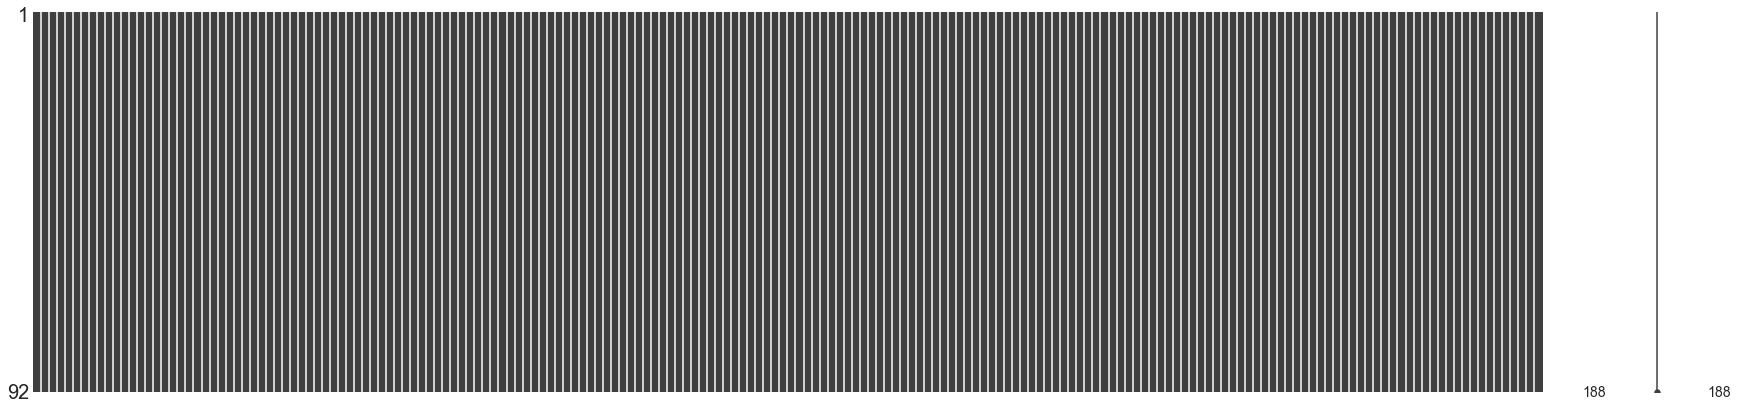

In [21]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_team_top5_1920_raw
msno.matrix(df_fbref_team_top5_1920_raw, figsize = (30, 7))

In [22]:
# Counts of missing values
null_value_stats = df_fbref_team_top5_1920_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

The visualisation shows us very quickly that there are only missing values for `Province/State`. The data is good enough for our needs in it's current state.

#### <a id='#section3.2.2'>3.2.2. Outfield Players</a>

##### <a id='#section3.2.2.1'>3.2.2.1. Data Dictionary</a>
The raw dataset has one hundred and eighty eight features (columns) with the following definitions and data types:

| Variable     | Data Type    | Description    |
|------|-----|-----|
| `squad`    | object    | Squad name e.g. Arsenal    |
| `players_used`    | float64    | Number of Players used in Games    |
| `possession`    | float64    | Percentage of time with possession of the ball    |


<br>
The features will be cleaned, converted and also additional features will be created in the [Data Engineering](#section4) section (Section 4).

##### <a id='#section3.2.2.2'>3.2.2.2 Creating the DataFrame - scraping the data</a>
Scrape the data and save as a pandas DataFrame using the function `get_outfield_data`.

For outfielders, we are not required to download the data for individual leagues and concatenate them, they can be downloaded as one from the 'Big 5' European leagues players page.

In [23]:
# Notes
# Go to the 'Standard stats' page of the league
# For Premier League 2019/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
# Remove the 'stats', and pass the first and third part of the link as parameters like below


# Download player data from the 'Top 5' leagues for the 19/20 season

## 19/20
df_fbref_outfield_top5_1920_raw = get_outfield_data('https://fbref.com/en/comps/Big5/','/players/Big-5-European-Leagues-Stats')
df_fbref_outfield_top5_1920_raw.to_csv(data_dir_fbref + '/raw/outfield/' + 'player_big5_1920_raw_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

## 18/19
df_fbref_outfield_top5_1819_raw = get_outfield_data('https://fbref.com/en/comps/Big5/','/players/2018-2019-Big-5-European-Leagues-Stats')
df_fbref_outfield_top5_1819_raw.to_csv(data_dir_fbref + '/raw/outfield/' + 'player_big5_1819_raw.csv', index=None, header=True)

## 17/18
df_fbref_outfield_top5_1718_raw = get_outfield_data('https://fbref.com/en/comps/Big5/','/players/2017-2018-Big-5-European-Leagues-Stats')
df_fbref_outfield_top5_1718_raw.to_csv(data_dir_fbref + '/raw/outfield/' + 'player_big5_1718_raw.csv', index=None, header=True)

##### <a id='#section3.2.2.3'>3.2.2.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [24]:
# Display the first 5 rows of the raw DataFrame, df_fbref_outfield_top5_1920_raw
df_fbref_outfield_top5_1920_raw.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,1.0,1.0,90.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0
1,Laurent Abergel,fr FRA,MF,Lorient,27,1993,1.0,0.0,79.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0,25.0
2,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,1.0,1.0,90.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,13.0,4.0,2.0,66.7
3,Ruben Aguilar,fr FRA,DF,Monaco,27,1993,1.0,1.0,90.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,18.0,1.0,0.0,100.0
4,Jean-Eudes Aholou,ci CIV,MF,Monaco,26,1994,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,50.0


In [25]:
# Display the last 5 rows of the raw DataFrame, df_fbref_outfield_top5_1920_raw
df_fbref_outfield_top5_1920_raw.tail()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
208,Yusuf Yazıcı,tr TUR,MF,Lille,23,1997,1.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
209,Burak Yılmaz,tr TUR,FW,Lille,35,1985,1.0,0.0,27.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
210,Arber Zeneli,xk KVX,FW,Reims,25,1995,1.0,0.0,31.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
211,Mehdi Zerkane,fr FRA,MF,Bordeaux,21,1999,1.0,1.0,19.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,Kévin Zohi,ci CIV,MF,Strasbourg,23,1996,1.0,0.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [26]:
# Print the shape of the raw DataFrame, df_fbref_outfield_top5_1920
print(df_fbref_outfield_top5_1920_raw.shape)

(213, 151)


The raw DataFrame has:
*    744 observations (rows), each observation represents one individual tourist stranded in Peru, and
*    20 attributes (columns).

[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [27]:
# Features (column names) of the raw DataFrame, df_fbref_outfield_top5_1920_raw
df_fbref_outfield_top5_1920_raw.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games', 'games_starts', 'minutes', 'goals',
       ...
       'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals',
       'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct'],
      dtype='object', length=151)

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [28]:
# Data types of the features of the raw DataFrame, df_fbref_outfield_top5_1920_raw
df_fbref_outfield_top5_1920_raw.dtypes

player              object
nationality         object
position            object
squad               object
age                 object
                    ...   
own_goals          float64
ball_recoveries    float64
aerials_won        float64
aerials_lost       float64
aerials_won_pct    float64
Length: 151, dtype: object

In [29]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_outfield_top5_1920_raw.dtypes)

player                          object
nationality                     object
position                        object
squad                           object
age                             object
birth_year                      object
games                          float64
games_starts                   float64
minutes                        float64
goals                          float64
assists                        float64
pens_made                      float64
pens_att                       float64
cards_yellow                   float64
cards_red                      float64
goals_per90                    float64
assists_per90                  float64
goals_assists_per90            float64
goals_pens_per90               float64
goals_assists_pens_per90       float64
xg                             float64
npxg                           float64
xa                             float64
xg_per90                       float64
xa_per90                       float64
xg_xa_per90              

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [30]:
# Info for the raw DataFrame, df_fbref_outfield_top5_1920_raw
df_fbref_outfield_top5_1920_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Columns: 151 entries, player to aerials_won_pct
dtypes: float64(145), object(6)
memory usage: 251.4+ KB


The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [31]:
# Description of the raw DataFrame, df_fbref_outfield_top5_1920_raw, showing some summary statistics for each numberical column in the DataFrame
df_fbref_outfield_top5_1920_raw.describe()

,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
count,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.0,213.000000,213.000000,213.000000,213.000000
mean,1.0,0.723005,64.183099,0.084507,0.061033,0.009390,0.009390,0.117371,0.018779,0.15446,...,0.915493,0.892019,0.061033,0.004695,0.009390,0.0,4.967136,0.877934,0.877934,33.979343
std,0.0,0.448568,30.663562,0.295236,0.239955,0.096672,0.096672,0.322620,0.136065,0.94254,...,1.047186,1.065134,0.293053,0.068519,0.096672,0.0,3.850245,1.222483,1.167214,39.929555
min,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,8.000000,1.000000,2.000000,66.700000
max,1.0,1.000000,90.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.86000,...,5.000000,6.000000,2.000000,1.000000,1.000000,0.0,18.000000,7.000000,6.000000,100.000000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

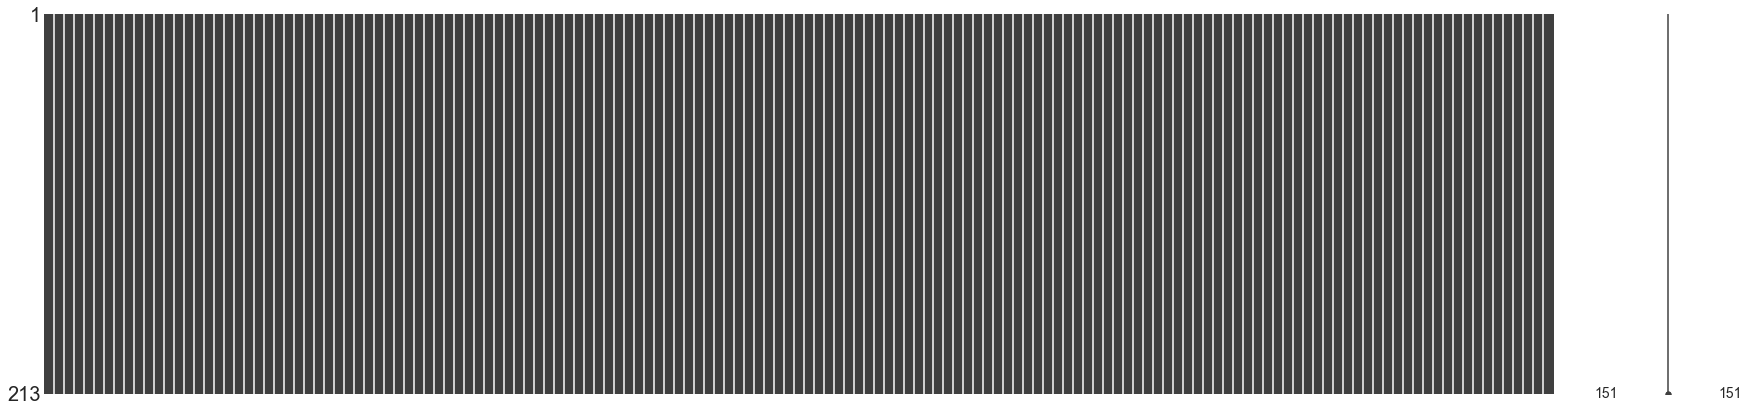

In [32]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_outfield_top5_1920_raw
msno.matrix(df_fbref_outfield_top5_1920_raw, figsize = (30, 7))

In [33]:
# Counts of missing values
null_value_stats = df_fbref_outfield_top5_1920_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

The visualisation shows us very quickly that there are only missing values for `Province/State`. The data is good enough for our needs in it's current state.

#### <a id='#section3.2.3'>3.2.3. Goalkeepers</a>

##### <a id='#section3.2.3.1'>3.2.3.1. Data Dictionary</a>
The raw dataset has one hundred and eighty eight features (columns) with the following definitions and data types:

| Variable     | Data Type    | Description    |
|------|-----|-----|
| `squad`    | object    | Squad name e.g. Arsenal    |
| `players_used`    | float64    | Number of Players used in Games    |
| `possession`    | float64    | Percentage of time with possession of the ball    |


<br>
The features will be cleaned, converted and also additional features will be created in the [Data Engineering](#section4) section (Section 4).

##### <a id='#section3.2.3.2'>3.2.3.2 Creating the DataFrame - scraping the data</a>
Scrape the data and save as a pandas DataFrame using the function `get_keeper_data`.

Like the outfielders, to download the goalkeeper data we are not required to download the data for individual leagues and concatenate them, they can be downloaded as one from the 'Big 5' European leagues goalkeepers page.

In [34]:
# Notes
# Go to the 'Standard stats' page of the league
# For Premier League 2019/20, the link is this: https://fbref.com/en/comps/9/stats/Premier-League-Stats
# Remove the 'stats', and pass the first and third part of the link as parameters like below


# Download goalkeeper data from the 'Top 5' leagues for the 19/20 season

## 19/20
df_fbref_goalkeeper_top5_1920_raw = get_keeper_data('https://fbref.com/en/comps/Big5/','/players/Big-5-European-Leagues-Stats')
df_fbref_goalkeeper_top5_1920_raw.to_csv(data_dir_fbref + '/raw/goalkeeper/' + 'goalkeeper_big5_1920_raw_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

## 18/19
df_fbref_goalkeeper_top5_1819_raw = get_keeper_data('https://fbref.com/en/comps/Big5/','/players/2018-2019-Big-5-European-Leagues-Stats')
df_fbref_goalkeeper_top5_1819_raw.to_csv(data_dir_fbref + '/raw/goalkeeper/' + 'goalkeeper_big5_1819_raw.csv', index=None, header=True)

## 17/18
df_fbref_goalkeeper_top5_1718_raw = get_keeper_data('https://fbref.com/en/comps/Big5/','/players/2017-2018-Big-5-European-Leagues-Stats')
df_fbref_goalkeeper_top5_1718_raw.to_csv(data_dir_fbref + '/raw/goalkeeper/' + 'goalkeeper_big5_1718_raw.csv', index=None, header=True)

##### <a id='#section3.2.2.3'>3.2.2.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [35]:
# Display the first 5 rows of the raw DataFrame, df_fbref_goalkeeper_top5_1920_raw
df_fbref_goalkeeper_top5_1920_raw.head()

,player,nationality,position,squad,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
0,Walter Benítez,ar ARG,GK,Nice,27,1993,1.0,1.0,90.0,1.0,...,31.4,8.0,12.5,18.9,14.0,2.0,14.3,1.0,1.0,10.7
1,Paul Bernardoni,fr FRA,GK,Angers,23,1997,1.0,1.0,90.0,0.0,...,32.0,5.0,40.0,35.4,5.0,0.0,0.0,0.0,0.0,11.3
2,Benoît Costil,fr FRA,GK,Bordeaux,33,1987,1.0,1.0,90.0,0.0,...,49.4,4.0,100.0,73.0,8.0,0.0,0.0,2.0,2.0,16.6
3,Alfred Gomis,sn SEN,GK,Dijon,26,1993,1.0,1.0,90.0,1.0,...,25.3,10.0,20.0,29.6,12.0,0.0,0.0,1.0,1.0,15.5
4,Eiji Kawashima,jp JPN,GK,Strasbourg,37,1983,1.0,1.0,90.0,3.0,...,27.9,4.0,50.0,49.3,7.0,1.0,14.3,1.0,1.0,13.2


In [36]:
# Display the last 5 rows of the raw DataFrame, df_fbref_goalkeeper_top5_1920_raw
df_fbref_goalkeeper_top5_1920_raw.tail()

,player,nationality,position,squad,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
9,Mike Maignan,fr FRA,GK,Lille,24,1995,1.0,1.0,90.0,1.0,...,43.2,9.0,88.9,72.6,7.0,1.0,14.3,0.0,0.0,12.8
10,Edouard Mendy,sn SEN,GK,Rennes,28,1992,1.0,1.0,90.0,1.0,...,37.9,6.0,33.3,35.2,6.0,1.0,16.7,0.0,0.0,10.0
11,Paul Nardi,fr FRA,GK,Lorient,26,1994,1.0,1.0,90.0,1.0,...,29.3,6.0,50.0,44.2,5.0,0.0,0.0,1.0,1.0,12.4
12,Predrag Rajković,rs SRB,GK,Reims,24,1995,1.0,1.0,90.0,2.0,...,48.8,18.0,77.8,56.2,17.0,0.0,0.0,0.0,0.0,13.8
13,Baptiste Reynet,fr FRA,GK,Nîmes,29,1990,1.0,1.0,90.0,0.0,...,51.6,7.0,85.7,61.7,5.0,0.0,0.0,0.0,0.0,13.3


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [37]:
# Print the shape of the raw DataFrame, df_fbref_goalkeeper_top5_1920_raw
print(df_fbref_goalkeeper_top5_1920_raw.shape)

(14, 47)


The raw DataFrame has:
*    744 observations (rows), each observation represents one individual tourist stranded in Peru, and
*    20 attributes (columns).

[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [38]:
# Features (column names) of the raw DataFrame, df_fbref_goalkeeper_top5_1920_raw
df_fbref_goalkeeper_top5_1920_raw.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games_gk', 'games_starts_gk', 'minutes_gk', 'goals_against_gk',
       'goals_against_per90_gk', 'shots_on_target_against', 'saves',
       'save_pct', 'wins_gk', 'draws_gk', 'losses_gk', 'clean_sheets',
       'clean_sheets_pct', 'pens_att_gk', 'pens_allowed', 'pens_saved',
       'pens_missed_gk', 'minutes_90s_gk', 'free_kick_goals_against_gk',
       'corner_kick_goals_against_gk', 'own_goals_against_gk', 'psxg_gk',
       'psnpxg_per_shot_on_target_against', 'psxg_net_gk', 'psxg_net_per90_gk',
       'passes_completed_launched_gk', 'passes_launched_gk',
       'passes_pct_launched_gk', 'passes_gk', 'passes_throws_gk',
       'pct_passes_launched_gk', 'passes_length_avg_gk', 'goal_kicks',
       'pct_goal_kicks_launched', 'goal_kick_length_avg', 'crosses_gk',
       'crosses_stopped_gk', 'crosses_stopped_pct_gk',
       'def_actions_outside_pen_area_gk',
       'def_actions_outside_pen_area_per90_gk', 

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [39]:
# Data types of the features of the raw DataFrame, df_fbref_goalkeeper_top5_1920_raw
df_fbref_goalkeeper_top5_1920_raw.dtypes

player                                    object
nationality                               object
position                                  object
squad                                     object
age                                       object
birth_year                                object
games_gk                                 float64
games_starts_gk                          float64
minutes_gk                               float64
goals_against_gk                         float64
goals_against_per90_gk                   float64
shots_on_target_against                  float64
saves                                    float64
save_pct                                 float64
wins_gk                                  float64
draws_gk                                 float64
losses_gk                                float64
clean_sheets                             float64
clean_sheets_pct                         float64
pens_att_gk                              float64
pens_allowed        

In [40]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_goalkeeper_top5_1920_raw.dtypes)

player                                    object
nationality                               object
position                                  object
squad                                     object
age                                       object
birth_year                                object
games_gk                                 float64
games_starts_gk                          float64
minutes_gk                               float64
goals_against_gk                         float64
goals_against_per90_gk                   float64
shots_on_target_against                  float64
saves                                    float64
save_pct                                 float64
wins_gk                                  float64
draws_gk                                 float64
losses_gk                                float64
clean_sheets                             float64
clean_sheets_pct                         float64
pens_att_gk                              float64
pens_allowed        

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [41]:
# Info for the raw DataFrame, df_fbref_goalkeeper_top5_1920_raw
df_fbref_goalkeeper_top5_1920_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   player                                 14 non-null     object 
 1   nationality                            14 non-null     object 
 2   position                               14 non-null     object 
 3   squad                                  14 non-null     object 
 4   age                                    14 non-null     object 
 5   birth_year                             14 non-null     object 
 6   games_gk                               14 non-null     float64
 7   games_starts_gk                        14 non-null     float64
 8   minutes_gk                             14 non-null     float64
 9   goals_against_gk                       14 non-null     float64
 10  goals_against_per90_gk                 14 non-null     float64
 11  shots_on

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [42]:
# Description of the raw DataFrame, df_fbref_goalkeeper_top5_1920_raw, showing some summary statistics for each numberical column in the DataFrame
df_fbref_goalkeeper_top5_1920_raw.describe()

,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
count,14.0,14.0,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.0,1.0,90.0,1.285714,1.285714,2.785714,1.642857,0.586929,0.285714,0.428571,...,36.464286,7.428571,47.314286,42.428571,7.357143,0.500000,9.021429,0.928571,0.928571,14.542857
std,0.0,0.0,0.0,1.204388,1.204388,1.717716,1.336306,0.405764,0.468807,0.513553,...,9.241429,3.694368,32.909944,18.174684,4.217311,0.759555,17.978285,1.328057,1.328057,5.160756
min,1.0,1.0,90.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,25.300000,3.000000,0.000000,18.900000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,1.0,1.0,90.0,0.250000,0.250000,1.000000,1.000000,0.233250,0.000000,0.000000,...,28.250000,5.250000,23.325000,28.700000,5.000000,0.000000,0.000000,0.000000,0.000000,11.575000
50%,1.0,1.0,90.0,1.000000,1.000000,3.000000,1.000000,0.667000,0.000000,0.000000,...,34.350000,7.000000,45.000000,39.800000,6.500000,0.000000,0.000000,1.000000,1.000000,13.250000
75%,1.0,1.0,90.0,2.000000,2.000000,3.750000,3.000000,1.000000,0.750000,1.000000,...,43.125000,8.750000,75.025000,54.475000,7.750000,1.000000,14.300000,1.000000,1.000000,16.325000
max,1.0,1.0,90.0,4.000000,4.000000,6.000000,4.000000,1.000000,1.000000,1.000000,...,51.600000,18.000000,100.000000,73.000000,17.000000,2.000000,66.700000,5.000000,5.000000,29.000000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

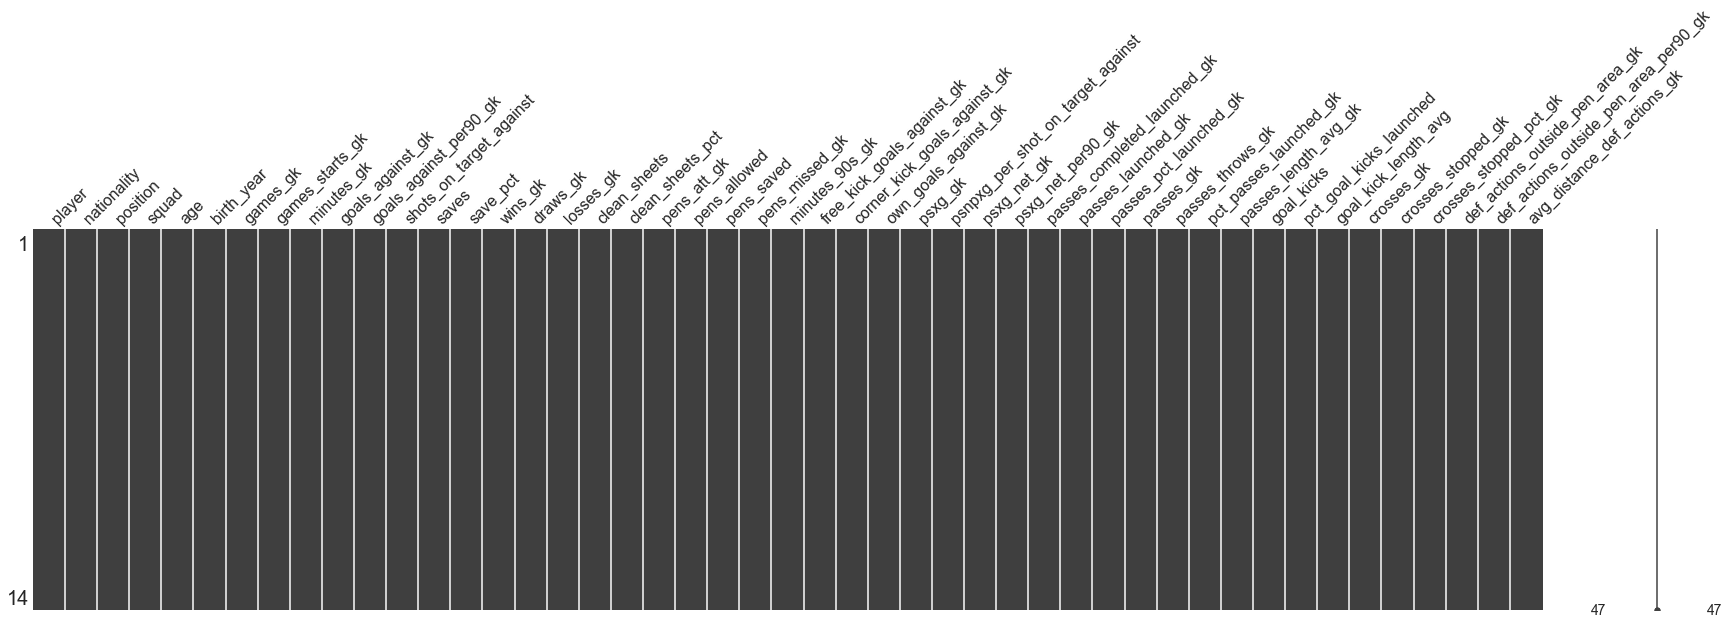

In [43]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_goalkeeper_top5_1920_raw
msno.matrix(df_fbref_goalkeeper_top5_1920_raw, figsize = (30, 7))

In [44]:
# Counts of missing values
null_value_stats = df_fbref_goalkeeper_top5_1920_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

The visualisation shows us very quickly that there are only missing values for `Province/State`. The data is good enough for our needs in it's current state.

### <a id='#section3.2'>3.3. TransferMarkt</a>
[TransferMarkt](https://www.transfermarkt.co.uk/) is a German-based website owned by [Axel Springer](https://www.axelspringer.com/en/) and is the leading website for the football transfer market. The website posts football related data, including: scores and results, football news, transfer rumours, and most usefully for us - calculated estimates ofthe market values for teams and individual players.

To read more about how these estimations are made, [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann does an excellent job of explaining how the estimations are made and their level of accuracy.

#### <a id='#section3.3.1'>3.3.1. Teams</a>

In [45]:
# SPACE HERE FOR CODE TO SCRAPE TRANSFERMARKT TEAMS PAGES (NOT YET WRITTEN)

#### <a id='#section3.3.2'>3.3.2. Players (Outfielders and Goalkeepers)</a>

##### <a id='#section3.3.2.1'>3.3.2.1. Data Dictionaries</a>
The [TransferMarkt](https://www.transfermarkt.co.uk/) dataset has six features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `position_number`    | object     |
| `position_description`    | object     |
| `name`    | object     |
| `dob`    | object     |
| `nationality`    | object     |
| `value`    | object     |

##### <a id='#section3.3.2.2'>3.3.2.2. Creating the DataFrame - scraping the data</a>
Before scraping data from [TransferMarkt](https://www.transfermarkt.co.uk/), we need to look at the top five leagues that we wish to scrape.

The web scraper for [TransferMarkt](https://www.transfermarkt.co.uk/) is made up of two parts:
1.    In the first part, the scraper takes the webpages for each of the individual leagues  e.g. The Premier League, and extract the hyperlinks to the pages of all the individual teams in the league table.
2.    In the second part the script, the webscraper uses the list of invidual teams hyperlinks collected in part 1 to then collect the hyperlinks for each of the players for those teams. From this, the scraper can then extract the information we need for each of these players.

This information collected for all the players is converted to a [pandas](http://pandas.pydata.org/) DataFrame from which we can view and manipulate the data.

An example webpage for a football league is the following: https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/GB1/plus/?saison_id=2019. As we can see, between the subdirectory path of `'/wettbewerb/'` and the `'/plus/'`, there is a 3 or 4 digit code. For The Premier League, the code is GB1. 

In order to scrape the webpages from [TransferMarkt](https://www.transfermarkt.co.uk/), the codes of the top five leagues need to be recorded from [TransferMarkt](https://www.transfermarkt.co.uk/), which are the following:

| League Name on FIFA    | Country    | Corresponding [TransferMarkt](https://www.transfermarkt.co.uk/) League Code    |
|------|-----|-----|
| LaLiga Santander    | Spain    | ES1    |
| Ligue 1 Conforama    | France    | FR1    |
| Premier League    | England    | GB1    |
| Serie A TIM    | Italy    | IT1    |
| Bundesliga    | Germany    | L1    |

In [46]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:75.0) Gecko/20100101 Firefox/75.0'
}

In [47]:
# List of leagues by code for which we want to scrape player data
lst_leagues = ['ES1', 'FR1', 'GB1', 'IT1', 'L1']

In [48]:
# Assign season by year to season variable e.g. 2014/15 season = 2014
season = '2019'    # 2019/20 season

In [49]:
"""
# Uncomment this code to scrape latest version of this data from TransferMarkt (approx 30 mins)
# Code is currently commented out to avoid needless repetitionn for running this script.

def main(url):
    with requests.Session() as req:
        links = []
        for lea in lst_leagues:
            print(f"Fetching Links from {lea}")
            r = req.get(url.format(lea), headers=headers)
            soup = BeautifulSoup(r.content, 'html.parser')
            link = [f"{url[:31]}{item.next_element.get('href')}" for item in soup.findAll(
                "td", class_="hauptlink no-border-links hide-for-small hide-for-pad")]
            links.extend(link)

        print(f"Collected {len(links)} Links")
        goals = []
        for num, link in enumerate(links):
            print(f"Extracting Page# {num +1}")
            r = req.get(link, headers=headers)
            soup = BeautifulSoup(r.content, 'html.parser')
            target = soup.find("table", class_="items")
            pn = [pn.text for pn in target.select("div.rn_nummer")]
            pos = [pos.text for pos in target.findAll("td", class_=False)]
            name = [name.text for name in target.select("td.hide")]
            dob = [date.find_next(
                "td").text for date in target.select("td.hide")]
            nat = [" / ".join([a.get("alt") for a in nat.find_all_next("td")[1] if a.get("alt")]) for nat in target.findAll(
                "td", itemprop="athlete")]
            val = [val.get_text(strip=True)
                   for val in target.select('td.rechts.hauptlink')]
            goal = zip(pn, pos, name, dob, nat, val)
            df = pd.DataFrame(goal, columns=[
                              'position_number', 'position_description', 'name', 'dob', 'nationality', 'value'])
            goals.append(df)

        new = pd.concat(goals)
        new.to_csv(data_dir_tm + '/raw/player/' + 'players_big5_1920_raw_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)


main("https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/{}/plus/?saison_id=2019")
"""

'\n# Uncomment this code to scrape latest version of this data from TransferMarkt (approx 30 mins)\n# Code is currently commented out to avoid needless repetitionn for running this script.\n\ndef main(url):\n    with requests.Session() as req:\n        links = []\n        for lea in lst_leagues:\n            print(f"Fetching Links from {lea}")\n            r = req.get(url.format(lea), headers=headers)\n            soup = BeautifulSoup(r.content, \'html.parser\')\n            link = [f"{url[:31]}{item.next_element.get(\'href\')}" for item in soup.findAll(\n                "td", class_="hauptlink no-border-links hide-for-small hide-for-pad")]\n            links.extend(link)\n\n        print(f"Collected {len(links)} Links")\n        goals = []\n        for num, link in enumerate(links):\n            print(f"Extracting Page# {num +1}")\n            r = req.get(link, headers=headers)\n            soup = BeautifulSoup(r.content, \'html.parser\')\n            target = soup.find("table", class

In [50]:
# Import data as a pandas DataFrame, df_tm_player_top5_1920_raw

## Look for most recent CSV file
list_of_files = glob.glob(data_dir_tm + '/raw/player/*') # * means all if need specific format then *.csv
filepath_latest_tm = max(list_of_files, key=os.path.getctime)

## Load in most recently parsed CSV file
df_tm_player_top5_1920_raw = pd.read_csv(filepath_latest_tm )

##### <a id='#section3.2.2.3'>3.2.2.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [51]:
# Display the first 5 rows of the raw DataFrame, df_tm_player_top5_1920_raw
df_tm_player_top5_1920_raw.head()

,position_number,position_description,name,dob,nationality,value
0,13,Goalkeeper,Thibaut Courtois,"May 11, 1992 (28)",Belgium,£43.20m
1,1,Goalkeeper,Alphonse Areola,"Feb 27, 1993 (27)",France / Philippines,£11.70m
2,5,Centre-Back,Raphaël Varane,"Apr 25, 1993 (27)",France / Martinique,£57.60m
3,3,Centre-Back,Éder Militão,"Jan 18, 1998 (22)",Brazil,£32.40m
4,4,Centre-Back,Sergio Ramos,"Mar 30, 1986 (34)",Spain,£13.05m


In [52]:
# Display the last 5 rows of the raw DataFrame, df_tm_player_top5_1920_raw
df_tm_player_top5_1920_raw.tail()

,position_number,position_description,name,dob,nationality,value
2738,-,Right Winger,Johannes Dörfler,"Aug 23, 1996 (23)",Germany,£203Th.
2739,-,Right Winger,Pascal Steinwender,"Aug 2, 1996 (23)",Germany,£113Th.
2740,30,Centre-Forward,Streli Mamba,"Jun 17, 1994 (26)",Germany / DR Congo,£1.44m
2741,11,Centre-Forward,Sven Michel,"Jul 15, 1990 (29)",Germany,£900Th.
2742,18,Centre-Forward,Dennis Srbeny,"May 5, 1994 (26)",Germany,£720Th.


In [53]:
# Print the shape of the raw DataFrame, df_tm_player_top5_1920_raw
print(df_tm_player_top5_1920_raw.shape)

(2743, 6)


The raw DataFrame has:
*    553 observations (rows), each observation represents one unique player, and
*    6 attributes (columns).

In [54]:
# Print the column names of the raw DataFrame, df_tm_player_top5_1920_raw
print(df_tm_player_top5_1920_raw.columns)

Index(['position_number', 'position_description', 'name', 'dob', 'nationality',
       'value'],
      dtype='object')


The dataset has six features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [55]:
# Data types of the features of the raw DataFrame, df_tm_player_top5_1920_raw
df_tm_player_top5_1920_raw.dtypes

position_number         object
position_description    object
name                    object
dob                     object
nationality             object
value                   object
dtype: object

All six of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [56]:
# Info for the raw DataFrame, df_tm_player_top5_1920_raw
df_tm_player_top5_1920_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   position_number       2743 non-null   object
 1   position_description  2743 non-null   object
 2   name                  2743 non-null   object
 3   dob                   2743 non-null   object
 4   nationality           2743 non-null   object
 5   value                 2688 non-null   object
dtypes: object(6)
memory usage: 128.7+ KB


In [57]:
# Description of the raw DataFrame, df_tm_player_top5_1920_raw, showing some summary statistics for each numberical column in the DataFrame
df_tm_player_top5_1920_raw.describe()

,position_number,position_description,name,dob,nationality,value
count,2743,2743,2743,2743,2743,2688
unique,84,14,2731,2196,415,140
top,-,Centre-Back,Adama Traoré,"Mar 18, 1999 (21)",Spain,£3.60m
freq,263,488,3,5,351,107


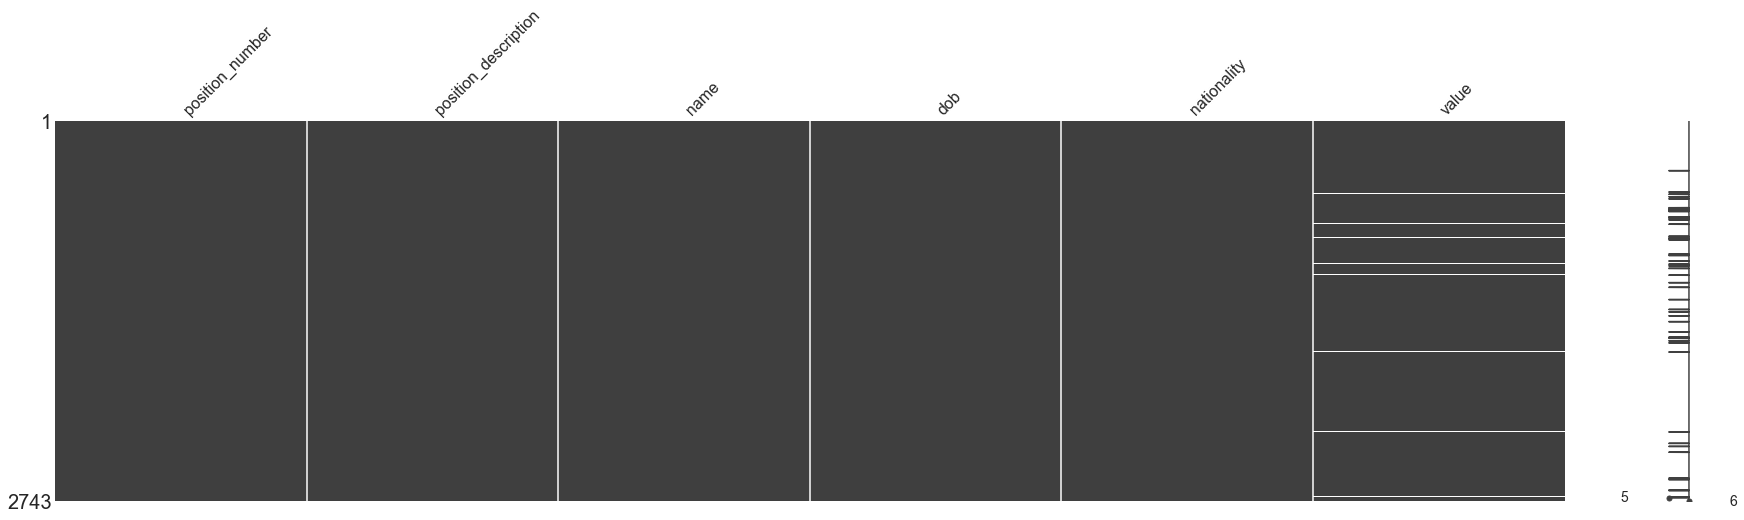

In [58]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_player_top5_1920_raw
msno.matrix(df_tm_player_top5_1920_raw, figsize = (30, 7))

In [59]:
# Counts of missing values
tm_null_value_stats = df_tm_player_top5_1920_raw.isnull().sum(axis=0)
tm_null_value_stats[tm_null_value_stats != 0]

value    55
dtype: int64

The visualisation shows us very quickly that there missing values in the `value` column.

## <a id='#section4'>4. Data Engineering</a>

### <a id='#section4.1'>4.1. Introduction</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean, wrangle, and join the two datasets to be in a form that meet our needs.

These two data sources are joined to create a single DataFrame in section 4.4 before going on to be analysed in section 5.

### <a id='#section4.2'>4.2. FBref</a>

#### <a id='#section4.2.1'>4.2.1. Teams</a>

#### <a id='#section4.2.2'>4.2.2. Outfield Players</a>

In [60]:
df_fbref_outfield_top5_1920 = df_fbref_outfield_top5_1920_raw

##### <a id='#section4.2.2.1'>4.2.2.1. String Cleaning</a>
...

##### Player

In [61]:
df_fbref_outfield_top5_1920['player_lower'] = df_fbref_outfield_top5_1920['player'].str.normalize('NFKD')\
                                                                                   .str.encode('ascii', errors='ignore')\
                                                                                   .str.decode('utf-8')\
                                                                                   .str.lower()

In [62]:
# First Name Lower
df_fbref_outfield_top5_1920['firstname_lower'] = df_fbref_outfield_top5_1920['player_lower'].str.rsplit(' ', 0).str[0]

# Last Name Lower
df_fbref_outfield_top5_1920['lastname_lower'] = df_fbref_outfield_top5_1920['player_lower'].str.rsplit(' ', 1).str[-1]

# First Initial Lower
df_fbref_outfield_top5_1920['firstinitial_lower'] = df_fbref_outfield_top5_1920['player_lower'].astype(str).str[0]

##### Countries

In [63]:
sorted(df_fbref_outfield_top5_1920['nationality'].unique())

['ar ARG',
 'at AUT',
 'ba BIH',
 'be BEL',
 'br BRA',
 'ca CAN',
 'cd COD',
 'ch SUI',
 'ci CIV',
 'cm CMR',
 'dk DEN',
 'dz ALG',
 'es ESP',
 'fr FRA',
 'ga GAB',
 'gh GHA',
 'gm GAM',
 'gn GUI',
 'gw GNB',
 'hr CRO',
 'it ITA',
 'jp JPN',
 'kr KOR',
 'ma MAR',
 'mg MAD',
 'ml MLI',
 'mz MOZ',
 'nc NCL',
 'ng NGA',
 'nl NED',
 'no NOR',
 'pt POR',
 'py PAR',
 're REU',
 'ro ROU',
 'rs SRB',
 'ru RUS',
 'sn SEN',
 'td CHA',
 'tg TOG',
 'tr TUR',
 'xk KVX',
 'zw ZIM']

In [64]:
df_countries = pd.read_csv('./data/countries_all.csv')

In [65]:
df_countries.head()

,id,full_country_name,fifa_code,ioc_code,iso_code
0,1,Afghanistan,AFG,AFG,AFG
1,2,Åland Islands,ALA,NaN,ALA
2,3,Albania,ALB,ALB,ALB
3,4,Algeria,ALG,ALG,DZA
4,5,American Samoa,ASA,ASA,ASM


In [66]:
df_fbref_outfield_top5_1920['nationality_code'] = df_fbref_outfield_top5_1920['nationality'].str.strip().str[-3:]

In [67]:
df_fbref_outfield_top5_1920.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code
0,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,1.0,1.0,90.0,0.0,...,0.0,6.0,0.0,2.0,0.0,yunis abdelhamid,yunis,abdelhamid,y,MAR
1,Laurent Abergel,fr FRA,MF,Lorient,27,1993,1.0,0.0,79.0,0.0,...,0.0,9.0,1.0,3.0,25.0,laurent abergel,laurent,abergel,l,FRA
2,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,1.0,1.0,90.0,0.0,...,0.0,13.0,4.0,2.0,66.7,nayef aguerd,nayef,aguerd,n,MAR
3,Ruben Aguilar,fr FRA,DF,Monaco,27,1993,1.0,1.0,90.0,0.0,...,0.0,18.0,1.0,0.0,100.0,ruben aguilar,ruben,aguilar,r,FRA
4,Jean-Eudes Aholou,ci CIV,MF,Monaco,26,1994,1.0,0.0,4.0,0.0,...,0.0,0.0,1.0,1.0,50.0,jean-eudes aholou,jean-eudes,aholou,j,CIV


In [68]:
dict(zip(df_countries['fifa_code'], df_countries['full_country_name']))
pd.Series(df_countries['fifa_code'].values,index=df_countries['full_country_name']).to_dict()
dict_countries = df_countries.set_index('fifa_code').to_dict()['full_country_name']
dict_countries 

{'AFG': 'Afghanistan',
 'ALA': 'Åland Islands',
 'ALB': 'Albania',
 'ALG': 'Algeria',
 'ASA': 'American Samoa',
 'AND': 'Andorra',
 'ANG': 'Angola',
 'AIA': 'Anguilla',
 'ATA': 'Antarctica',
 'ATG': 'Antigua and Barbuda',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ARU': 'Aruba',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BAH': 'The Bahamas',
 'BHR': 'Bahrain',
 'BAN': 'Bangladesh',
 'BRB': 'Barbados',
 'BLR': 'Belarus',
 'BEL': 'Belgium',
 'BLZ': 'Belize',
 'BEN': 'Benin',
 'BER': 'Bermuda',
 'BHU': 'Bhutan',
 'BOL': 'Bolivia',
 'BES': 'Caribbean Netherlands: Bonaire, Sint Eustatius and Saba',
 'BIH': 'Bosnia and Herzegovina',
 'BOT': 'Botswana',
 'BVT': 'Bouvet Island',
 'BRA': 'Brazil',
 'IOT': 'British Indian Ocean Territory',
 'VGB': 'British Virgin Islands',
 'BRU': 'Brunei',
 'BUL': 'Bulgaria',
 'BFA': 'Burkina Faso',
 'BDI': 'Burundi',
 'CAM': 'Cambodia',
 'CMR': 'Cameroon',
 'CAN': 'Canada',
 'CPV': 'Cape Verde',
 'CAY': 'Cayman Islands',
 'CTA': 'Central Af

In [69]:
df_fbref_outfield_top5_1920['nationality_cleaned'] = df_fbref_outfield_top5_1920['nationality_code'].map(dict_countries)

##### Position

In [70]:
sorted(df_fbref_outfield_top5_1920['position'].unique())

['DF', 'FW', 'FW,MF', 'GK', 'MF', 'MF,DF', 'MF,FW']

In [71]:
dict_positions={
    'DF': 'Defender',
    'DF,FW': 'Defender',
    'DF,MF': 'Defender',
    'FW': 'Forward',
    'FW,DF': 'Forward',
    'FW,MF': 'Forward',
    'GK': 'Goalkeeper',
    'GK,FW': 'Goalkeeper',
    'MF': 'Midfielder',
    'MF,DF': 'Midfielder',
    'MF,FW': 'Midfielder'
}

In [72]:
df_fbref_outfield_top5_1920['position_cleaned'] = df_fbref_outfield_top5_1920['position'].map(dict_positions)

In [73]:
df_fbref_outfield_top5_1920.head(50)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,aerials_won,aerials_lost,aerials_won_pct,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
0,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,1.0,1.0,90.0,0.0,...,0.0,2.0,0.0,yunis abdelhamid,yunis,abdelhamid,y,MAR,Morocco,Defender
1,Laurent Abergel,fr FRA,MF,Lorient,27,1993,1.0,0.0,79.0,0.0,...,1.0,3.0,25.0,laurent abergel,laurent,abergel,l,FRA,France,Midfielder
2,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,1.0,1.0,90.0,0.0,...,4.0,2.0,66.7,nayef aguerd,nayef,aguerd,n,MAR,Morocco,Defender
3,Ruben Aguilar,fr FRA,DF,Monaco,27,1993,1.0,1.0,90.0,0.0,...,1.0,0.0,100.0,ruben aguilar,ruben,aguilar,r,FRA,France,Defender
4,Jean-Eudes Aholou,ci CIV,MF,Monaco,26,1994,1.0,0.0,4.0,0.0,...,1.0,1.0,50.0,jean-eudes aholou,jean-eudes,aholou,j,CIV,Côte d'Ivoire,Midfielder
5,Ludovic Ajorque,re REU,FW,Strasbourg,26,1994,1.0,1.0,90.0,0.0,...,4.0,0.0,100.0,ludovic ajorque,ludovic,ajorque,l,REU,Réunion,Forward
6,Romain Amalfitano,fr FRA,DF,Dijon,30,1989,1.0,0.0,46.0,0.0,...,1.0,0.0,100.0,romain amalfitano,romain,amalfitano,r,FRA,France,Defender
7,Benjamin André,fr FRA,MF,Lille,29,1990,1.0,1.0,89.0,0.0,...,7.0,1.0,87.5,benjamin andre,benjamin,andre,b,FRA,France,Midfielder
8,Dennis Appiah,fr FRA,DF,Nantes,28,1992,1.0,0.0,9.0,0.0,...,2.0,0.0,100.0,dennis appiah,dennis,appiah,d,FRA,France,Defender
9,Luiz Araújo,br BRA,MF,Lille,24,1996,1.0,0.0,9.0,0.0,...,1.0,0.0,100.0,luiz araujo,luiz,araujo,l,BRA,Brazil,Midfielder


##### <a id='#section4.2.2.2'>4.2.2.2. Converting Data Types</a>
We are required to convert all the columns with their proper data types.

##### Age
The calculated `age` column needs to be converted from a float to an integer, with all null values ignored, using to [astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) method.

In [74]:
# Redetermine the age using the newly created birth_date column (after formatted to datetime data type)

## Remove all not numeric values use to_numeric with parameter errors='coerce' - it replaces non numeric to NaNs
df_fbref_outfield_top5_1920['age'] = pd.to_numeric(df_fbref_outfield_top5_1920['age'], errors='coerce')

## Convert floats to integers and leave null values
df_fbref_outfield_top5_1920['age'] = np.nan_to_num(df_fbref_outfield_top5_1920['age']).astype(int)

##### Birth Year 
...

In [75]:
# Convert string to integer
df_fbref_outfield_top5_1920['birth_year'] = pd.to_numeric(df_fbref_outfield_top5_1920['birth_year'] )

In [76]:
df_fbref_outfield_top5_1920

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,aerials_won,aerials_lost,aerials_won_pct,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
0,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,1.0,1.0,90.0,0.0,...,0.0,2.0,0.0,yunis abdelhamid,yunis,abdelhamid,y,MAR,Morocco,Defender
1,Laurent Abergel,fr FRA,MF,Lorient,27,1993,1.0,0.0,79.0,0.0,...,1.0,3.0,25.0,laurent abergel,laurent,abergel,l,FRA,France,Midfielder
2,Nayef Aguerd,ma MAR,DF,Rennes,24,1996,1.0,1.0,90.0,0.0,...,4.0,2.0,66.7,nayef aguerd,nayef,aguerd,n,MAR,Morocco,Defender
3,Ruben Aguilar,fr FRA,DF,Monaco,27,1993,1.0,1.0,90.0,0.0,...,1.0,0.0,100.0,ruben aguilar,ruben,aguilar,r,FRA,France,Defender
4,Jean-Eudes Aholou,ci CIV,MF,Monaco,26,1994,1.0,0.0,4.0,0.0,...,1.0,1.0,50.0,jean-eudes aholou,jean-eudes,aholou,j,CIV,Côte d'Ivoire,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Yusuf Yazıcı,tr TUR,MF,Lille,23,1997,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,yusuf yazc,yusuf,yazc,y,TUR,Turkey,Midfielder
209,Burak Yılmaz,tr TUR,FW,Lille,35,1985,1.0,0.0,27.0,0.0,...,0.0,3.0,0.0,burak ylmaz,burak,ylmaz,b,TUR,Turkey,Forward
210,Arber Zeneli,xk KVX,FW,Reims,25,1995,1.0,0.0,31.0,0.0,...,0.0,0.0,0.0,arber zeneli,arber,zeneli,a,KVX,Kosovo,Forward
211,Mehdi Zerkane,fr FRA,MF,Bordeaux,21,1999,1.0,1.0,19.0,0.0,...,0.0,0.0,0.0,mehdi zerkane,mehdi,zerkane,m,FRA,France,Midfielder


##### <a id='#section4.2.2.3'>4.2.2.3. Export DataFrame</a>

In [77]:
df_fbref_outfield_top5_1920.to_csv(data_dir_fbref + '/engineered/outfield/' + 'player_big5_1920_engineered_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

#### <a id='#section4.2.3'>4.2.3. Goalkeepers</a>

In [78]:
df_fbref_goalkeeper_top5_1920 = df_fbref_goalkeeper_top5_1920_raw

##### <a id='#section4.2.3.1'>4.2.3.1. String Cleaning</a>

##### Player

In [79]:
df_fbref_goalkeeper_top5_1920['player_lower'] = df_fbref_goalkeeper_top5_1920['player'].str.normalize('NFKD')\
                                                                                       .str.encode('ascii', errors='ignore')\
                                                                                       .str.decode('utf-8')\
                                                                                       .str.lower()

In [80]:
# First Name Lower
df_fbref_goalkeeper_top5_1920['firstname_lower'] = df_fbref_goalkeeper_top5_1920['player_lower'].str.rsplit(' ', 0).str[0]

# Last Name Lower
df_fbref_goalkeeper_top5_1920['lastname_lower'] = df_fbref_goalkeeper_top5_1920['player_lower'].str.rsplit(' ', 1).str[-1]

# First Initial Lower
df_fbref_goalkeeper_top5_1920['firstinitial_lower'] = df_fbref_goalkeeper_top5_1920['player_lower'].astype(str).str[0]

##### <a id='#section4.2.3.2'>4.2.3.2. Converting Data Types</a>
We are required to convert all the columns with their proper data types.

##### Age
The calculated `age` column needs to be converted from a float to an integer, with all null values ignored, using to [astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) method.

In [81]:
# Redetermine the age using the newly created birth_date column (after formatted to datetime data type)

## Remove all not numeric values use to_numeric with parameter errors='coerce' - it replaces non numeric to NaNs
df_fbref_goalkeeper_top5_1920['age'] = pd.to_numeric(df_fbref_goalkeeper_top5_1920['age'], errors='coerce')

## Convert floats to integers and leave null values
df_fbref_goalkeeper_top5_1920['age'] = np.nan_to_num(df_fbref_goalkeeper_top5_1920['age']).astype(int)

##### Birth Year 
...

In [82]:
# Convert string to integer
df_fbref_goalkeeper_top5_1920['birth_year'] = pd.to_numeric(df_fbref_goalkeeper_top5_1920['birth_year'] )

##### <a id='#section4.2.3.3'>4.2.3.3. Export DataFrame</a>

In [83]:
df_fbref_goalkeeper_top5_1920.to_csv(data_dir_fbref + '/engineered/goalkeeper/' + 'goalkeeper_big5_1920_engineered_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index=None, header=True)

### <a id='#section4.3'>4.3. TransferMarket</a>

#### <a id='#section4.3.1'>4.3.1. Teams</a>

In [84]:
# SPACE HERE FOR CODE FOR SCRAPED TRANSFERMARKT TEAMS PAGES (NOT YET WRITTEN)

#### <a id='#section4.3.2'>4.3.2. Players (Outfield and Goalkeepers)</a>

In [85]:
# Assign df_tm_player_top5_1920_raw DataFrame to df_tm_player_top5_1920
df_tm_player_top5_1920 = df_tm_player_top5_1920_raw

##### <a id='#section4.3.2.1'>4.3.2.1. String Cleaning</a>
The first job to do for getting the [TransferMarkt](https://www.transfermarkt.co.uk/) DataFrame ready to be joined to the  [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) dataset is to clean the key strings. These include:
*    `dob` (to become seperate `DoB` and `Age` columns),
*    `nationality`, and
*    `value`.

##### Name

In [86]:
df_tm_player_top5_1920['name_lower'] = df_tm_player_top5_1920['name'].str.normalize('NFKD')\
                                                                     .str.encode('ascii', errors='ignore')\
                                                                     .str.decode('utf-8')\
                                                                     .str.lower()

In [87]:
# First Name Lower
df_tm_player_top5_1920 ['firstname_lower'] = df_tm_player_top5_1920['name_lower'].str.rsplit(' ', 0).str[0]

# Last Name Lower
df_tm_player_top5_1920['lastname_lower'] = df_tm_player_top5_1920['name_lower'].str.rsplit(' ', 1).str[-1]

# First Initial Lower
df_tm_player_top5_1920['firstinitial_lower'] = df_tm_player_top5_1920['name_lower'].astype(str).str[0]

##### DoB and Age
The `dob` column is messy and contains both the date of birth as a string and also the age in brackets.

This string cleaning consists of two parts, firstly, to split this apart into their seperate components. However, once the `age` column is created, we will replaced this by determining the current age using the Python [datetime](https://docs.python.org/3/library/datetime.html) module.

In [88]:
# DoB string cleaning to create birth_date and age columns
df_tm_player_top5_1920[['birth_date', 'age']] = df_tm_player_top5_1920['dob'].str.extract(r'(.+) \((\d+)\)')

##### Nationality
For the nationality, some of the players have duel nationality.

For example, [Claudio Pizarro](https://www.transfermarkt.co.uk/claudio-pizarro/profil/spieler/532) is a Peruvian-born player who has has made 85 appearances for Peru, scoring 20 goals. However, his citizenship according to [TransferMarkt](https://www.transfermarkt.co.uk/) is 'Peru / Italy'. For our needs, we only want to know the country the player is eligible to play for, not their full heritage which from observations is always the first part of the string. We'll therefore be discarding anything after the first space in the string to form a new `playing_country` column.

In [89]:
# Take the first nationality i.e. text before the first space, ex. 'Peru / Italy'
df_tm_player_top5_1920 ['playing_country'] = df_tm_player_top5_1920 ['nationality'].str.split(' /').str[0]

##### Value
The values of the players have prefixes (£), commas, spaces, and suffixes (m, k) that need to cleaned and replaced before converting to a numerical value.

In [90]:
# Value string cleaning from shortened string value to full numerical value

## Convert 'm' to '000000'
df_tm_player_top5_1920['value'] = df_tm_player_top5_1920['value'].str.replace('m','0000')

## Convert 'k' to '000'
df_tm_player_top5_1920['value'] = df_tm_player_top5_1920['value'].str.replace('k','000')

## Convert 'Th' to '000'
df_tm_player_top5_1920['value'] = df_tm_player_top5_1920['value'].str.replace('Th','000')

## Remove '.'
df_tm_player_top5_1920['value'] = df_tm_player_top5_1920['value'].str.replace('.','')

## Remove '£' sign
df_tm_player_top5_1920['value'] = df_tm_player_top5_1920['value'].str.replace('£','')

## Remove '-'
df_tm_player_top5_1920['value'] = df_tm_player_top5_1920['value'].str.replace('-','')

## Remove '¬†¬†'
df_tm_player_top5_1920['value'] = df_tm_player_top5_1920['value'].str.replace('¬†¬†','')

## Remove gaps
df_tm_player_top5_1920['value'] = df_tm_player_top5_1920['value'].str.replace(' ','')

##### <a id='#section4.3.2.1'>4.3.2.2. Converting Data Types</a>

##### DoB
First we need to convert the `dob` column from the `object` data type to `datetime64[ns]`, again using the [.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method.

In [91]:
# Convert birth_date from string to datetime64[ns]
df_tm_player_top5_1920['birth_date'] = pd.to_datetime(df_tm_player_top5_1920['birth_date'])

##### Age
The calculated `age` column needs to be converted from a float to an integer, with all null values ignored, using to [astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) method.

In [92]:
# Date and time manipulation
from datetime import datetime

In [93]:
# Redetermine the age using the newly created birth_date column (after formatted to datetime data type)

## Remove all not numeric values use to_numeric with parameter errors='coerce' - it replaces non numeric to NaNs
df_tm_player_top5_1920['age'] = pd.to_numeric(df_tm_player_top5_1920['age'], errors='coerce')

## Convert floats to integers and leave null values
df_tm_player_top5_1920['age'] = np.nan_to_num(df_tm_player_top5_1920['age']).astype(int)

## Calculate current age
today = datetime.today()
df_tm_player_top5_1920['age'] = df_tm_player_top5_1920['birth_date'].apply(lambda x: today.year - x.year - 
                                                                               ((today.month, today.day) < (x.month, x.day)) 
                                                                          )


# df_tm_player_top5_1920['age'] = pd.to_numeric(ddf_tm_player_top5_1920['age'], downcast='signed')

##### Value
The `value` column needs to be converted from a string to an integer using to [to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) method.

In [94]:
# Convert string to integer
df_tm_player_top5_1920['value'] = pd.to_numeric(df_tm_player_top5_1920['value'])

##### Position
...

In [95]:
sorted(df_tm_player_top5_1920['position_description'].unique())

['Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defensive Midfield',
 'Forward',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker']

In [96]:
dict_positions_tm={
    'Attacking Midfield': 'Midfielder',
    'Central Midfield': 'Midfielder',
    'Centre-Back': 'Defender',
    'Centre-Forward': 'Forward',
    'Defensive Midfield': 'Midfielder',
    'Forward': 'Forward',
    'Goalkeeper': 'Goalkeeper',
    'Left Midfield': 'Midfielder',
    'Left Winger': 'Forward',
    'Left-Back': 'Defender',
    'Right Midfield': 'Midfielder',
    'Right Winger': 'Forward',
    'Right-Back': 'Defender',
    'Second Striker': 'Forward'
}

In [97]:
df_tm_player_top5_1920['position_description_cleaned'] = df_tm_player_top5_1920['position_description'].map(dict_positions_tm)

##### <a id='#section4.3.2.3'>4.3.2.3. Create New Attributes</a>

In [98]:
df_tm_player_top5_1920['birth_year'] = pd.DatetimeIndex(df_tm_player_top5_1920['birth_date']).year
df_tm_player_top5_1920['birth_month'] = pd.DatetimeIndex(df_tm_player_top5_1920['birth_date']).month

##### <a id='#section4.3.2.4'>4.3.2.4. Columns of Interest</a>
Of the current nine columns in the [TransferMarkt](https://www.transfermarkt.co.uk/) dataset, we are only interested in five columns, which are the following:
*    `name`
*    `position_description`
*    `value`
*    `birth_date`
*    `age`
*    `playing_country`

In [99]:
df_tm_player_top5_1920 = df_tm_player_top5_1920[['name', 'name_lower', 'firstinitial_lower', 'firstname_lower', 'lastname_lower', 'position_description', 'position_description_cleaned', 'value', 'birth_date', 'birth_year', 'birth_month', 'age', 'playing_country']]

##### <a id='#section4.3.2.5'>4.3.2.5. Split Dataset into Outfielder Players and Goalkeepers</a>

In [100]:
# Assign df_tm as a new DataFrame - df_tm_player_top5_all_1920_all, to represent all the players
df_tm_player_top5_all_1920 = df_tm_player_top5_1920

# Filter rows for position_description is not equal to 'Goalkeeper'
df_tm_player_top5_outfield_1920 = df_tm_player_top5_all_1920[df_tm_player_top5_all_1920['position_description'] != 'Goalkeeper']

# Filter rows for position_description are equal to 'Goalkeeper'
df_tm_player_top5_goalkeeper_1920 = df_tm_player_top5_all_1920[df_tm_player_top5_all_1920['position_description'] == 'Goalkeeper']

In [101]:
df_tm_player_top5_all_1920_all.head()

NameError: name 'df_tm_player_top5_all_1920_all' is not defined

In [ ]:
df_tm_player_top5_outfield_1920.head()

In [ ]:
df_tm_player_top5_goalkeeper_1920.head()

#### <a id='#section4.5.6'>4.5.6. Exporting the Engineered DataFrames</a>
Like the [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) dataset, lets now export the engineered [TransferMarkt](https://www.transfermarkt.co.uk/) DataFrame, `df_tm`, as a CSV file.

In [ ]:
import datetime    # for some reason, if I don't import this again, the code break? :(

In [ ]:
df_tm_player_top5_all_1920.to_csv(data_dir_tm + '/engineered/player/' + 'all_big5_1920_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index = None, header=True)
df_tm_player_top5_outfield_1920.to_csv(data_dir_tm + '/engineered/player/' + 'outfield_big5_1920_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index = None, header=True)
df_tm_player_top5_goalkeeper_1920.to_csv(data_dir_tm + '/engineered/player/' + 'goalkeeper_big5_1920_{}.csv'.format(datetime.datetime.now().strftime("%d%m%Y-%H%M")), index = None, header=True)

Now we have created our two DataFrames and wrangled the data to meet our needs, we'll next need to merge the datasets to create a single DataFrame for [Exploratory Data Analysis ](#section5).

## <a id='#section5'>5. Fuzzy Match Datasets - Record Linkage</a>

### <a id='#section5.1'>5.1. Introduction</a>
Now we have our two engineered DataFrames for [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) and [TransferMarkt](https://www.transfermarkt.co.uk/) data, let's now merge them to form one dataset.

We have our cleaned datasets, however, matching of the data is still a tricky process. Let's take Lionel Messi as an example.

In the [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) database, he has the short_name of L. Messi and a long_name of Lionel Andrés Messi Cuccittini. In [TransferMarkt](https://www.transfermarkt.co.uk/), his name is Lionel Messi.

There are no real set rules for players like this. For example, many South American players can be known by a one word moniker on [TransferMarkt](https://www.transfermarkt.co.uk/) e.g. Real Madrid's Casemiero, but then have their full names in the [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) dataset - Carlos Henrique Venancio Casimiro.

We are then left in a state of trying to join two data sets together that do not have a common unique identifier.

However, to combat this, we can use a third-party Python library - [record linkage](https://pypi.org/project/recordlinkage/), installed using pip install recordlinkage. [record linkage](https://pypi.org/project/recordlinkage/) provides a simple interface to link records in or between data sources. The toolkit provides most of the tools needed for record linkage and deduplication. The package contains indexing methods, functions to compare records and classifiers. The package is developed for research and the linking of small or medium sized files.

For a full guide on how to use record linkage, see the official documentation [here](https://recordlinkage.readthedocs.io/en/latest/) and also this worked example by [Chris Moffitt](https://twitter.com/chris1610) [here](https://pbpython.com/record-linking.html)

Record Linkage steps:
1.    Preprocessing
2.    Indexing
3.    Comparing
4.    Classification
5.    Evaluation

#### What is Record Linkage as a concept - a definition
<b>'Record linkage'</b> is the term used by statisticians, epidemiologists, and historians, among others, to describe the process of joining records from one data source with another that describe the same entity ([source](https://en.wikipedia.org/wiki/Record_linkage)).

Record linkage is necessary when joining different data sets based on entities that may or may not share a common identifier (e.g., database key, URI, National identification number), which may be due to differences in record shape, storage location, or curator style or preference. A data set that has undergone RL-oriented reconciliation may be referred to as being cross-linked. Record linkage is referred to as data linkage in many jurisdictions, but the two are the same process.

### <a id='#section5.2'>5.2. Join the Datasets using Record Linkage</a>

#### <a id='#section5.2.1'>5.2.1. Team Datasets</a>

In [ ]:
# SPACE HERE FOR CODE TO JOIN FBref AND TRANSFERMARKT TEAMS PAGES (NOT YET DOWNLOADED TM CODE

#### <a id='#section5.2.2'>5.2.2. Outfielder Datasets</a>

#### 1) Indexing

Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-index.html

As the Record Linkage Toolkit has more configuration options, we need to perform a couple of steps to define the linkage rules. The first step is to create a indexer object.

The indexing module is used to make pairs of records. These pairs are called candidate links or candidate matches. There are several indexing algorithms available such as blocking and sorted neighborhood indexing. See the following references for background information about indexation

One key concept is that we can use blocking to limit the number of comparisons. For instance, we know that it is very likely that we only want to compare records that have the same last name, first name initial and birth year. We can use this knowledge to setup a block on these columns in both DataFrames:

In [ ]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'birth_year'], 
              right_on = ['firstinitial_lower', 'birth_year'])    # removed 'age' as they don't match in the two datasets

The next step is to build up all the potential candidates to check:

In [ ]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_fbref_outfield_top5_1920, df_tm_player_top5_outfield_1920)
print(len(candidates))

#### 2) Comparing
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-compare.html

Now that we have defined the left and right data sets and all the candidates, we can define how we want to perform the comparison logic using `Compare()`:

In [ ]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')
compare.string('position_cleaned',
               'position_description_cleaned',
               method='levenshtein',
               threshold=0.70,
               label='position')
compare.string('nationality_cleaned',
               'playing_country',
               method='levenshtein',
               threshold=0.70,
               label='nationality')

features = compare.compute(candidates, df_fbref_outfield_top5_1920, df_tm_player_top5_outfield_1920)

View the potential candidates

In [ ]:
# Record Linkage Step 4 - view the potential candidates
features

This DataFrame shows the results of all of the comparisons. There is one row for each row in the Company House and Fan360 DataFrames. The columns correspond to the comparisons we defined. A 1 is a match and 0 is not.

Given the large number of records with no matches, it is a little hard to see how many matches we might have. We can sum up the individual scores to see about the quality of the matches.

In [ ]:
# Sum up the individual scores to see the quality of the matches.
features.sum(axis=1).value_counts().sort_index(ascending=False)

To only include high-quality matches, let’s just take all the records with more than 3 matches out of 5 and create a total score column:

In [ ]:
# Show records that have match by index number
potential_matches = features[features.sum(axis=1) == 4].reset_index()
potential_matches

In [ ]:
potential_matches['Score'] = potential_matches.loc[:, 'last_name': 'last_name'].sum(axis=1)

# Display DataFrame of potential matches, potential_matches 
potential_matches

#### 3) Classification
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html

#### 4) Evaluation
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html

#### 5) Next steps - joining the original datasets to create merged dataset
Next we join both original datasets by their index to this index to the potential matches DataFrame onto the corresponding level columns - level_0 and level_1. This then creates the joined DataFrame of Company House and Fan360 data.

In [ ]:
# Join the Company House DataFrame to the potential matches DataFrame
df_merge = pd.merge(potential_matches, df_fbref_outfield_top5_1920, left_on='level_0', right_index=True)

# Join the Fan360 DataFrame to the potential matches DataFrame
df_merge = pd.merge(df_merge, df_tm_player_top5_outfield_1920, left_on='level_1', right_index=True)

In [ ]:
df_merge

Now that we've merged the DataFrames, the next step is to clean the DataFrame, reorder the columns, and only keep the columns of interest.

In [ ]:
# Select columns of interest
cols_merge = ['player', 'nationality_cleaned', 'nationality_code', 'position_description', 'value', 'birth_date', 'age_y', 'Score']

# Create more concise DataFrame using only columns of interest
df_merge_select = df_merge[cols_merge]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_merge_select = df_merge_select.sort_values(by=['value', 'player'], ascending=[False, True])

In [ ]:
df_merge_select

In [ ]:
# Join the Company House DataFrame to the potential matches DataFrame
df_final = pd.merge(df_fbref_outfield_top5_1920, df_merge_select, left_on='player', right_on='player')

In [ ]:
# Select columns of interest
cols_final = ['player', 'value', 'nationality_cleaned_y', 'position_description', 'squad', 'birth_date', 'age_y', 'games', 'games_starts', 'minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'npxg', 'xa', 'xg_per90', 'xa_per90', 'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'minutes_90s', 'shots_total', 'shots_on_target', 'shots_free_kicks', 'shots_on_target_pct', 'shots_total_per90', 'shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_completed', 'passes', 'passes_pct', 'passes_total_distance', 'passes_progressive_distance', 'passes_completed_short', 'passes_short', 'passes_pct_short', 'passes_completed_medium', 'passes_medium', 'passes_pct_medium', 'passes_completed_long', 'passes_long', 'passes_pct_long', 'xa_net', 'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area', 'crosses_into_penalty_area', 'progressive_passes', 'passes_live', 'passes_dead', 'passes_free_kicks', 'through_balls', 'passes_pressure', 'passes_switches', 'crosses', 'corner_kicks', 'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight', 'passes_ground', 'passes_low', 'passes_high', 'passes_left_foot', 'passes_right_foot', 'passes_head', 'throw_ins', 'passes_other_body', 'passes_offsides', 'passes_oob', 'passes_intercepted', 'passes_blocked', 'sca', 'sca_per90', 'sca_passes_live', 'sca_passes_dead', 'sca_dribbles', 'sca_shots', 'sca_fouled', 'gca', 'gca_per90', 'gca_passes_live', 'gca_passes_dead', 'gca_dribbles', 'gca_shots', 'gca_fouled', 'gca_og_for', 'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'dribble_tackles', 'dribbles_vs', 'dribble_tackles_pct', 'dribbled_past', 'pressures', 'pressure_regains', 'pressure_regain_pct', 'pressures_def_3rd', 'pressures_mid_3rd', 'pressures_att_3rd', 'blocks', 'blocked_shots', 'blocked_shots_saves', 'blocked_passes', 'interceptions', 'clearances', 'errors', 'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd', 'touches_att_pen_area', 'touches_live_ball', 'dribbles_completed', 'dribbles', 'dribbles_completed_pct', 'players_dribbled_past', 'nutmegs', 'carries', 'carry_distance', 'carry_progressive_distance', 'pass_targets', 'passes_received', 'passes_received_pct', 'miscontrols', 'dispossessed', 'cards_yellow_red', 'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals', 'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct']

# Create more concise DataFrame using only columns of interest
df_final = df_final[cols_final]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_final = df_final.sort_values(by=['value', 'player'], ascending=[False, True])

In [ ]:
# Rename columns
df_final = df_final.rename(columns={'nationality_cleaned_y': 'nationality',
                                    'position_description': 'position',
                                    'age_y': 'age',
                                    'squad': 'club' 
                                   }
                          )

In [ ]:
df_final.shape

In [ ]:
df_final = df_final.drop_duplicates()

In [ ]:
df_final.shape

In [ ]:
df_final

In [ ]:
df_null = df_final.loc[pd.isnull(df_final).any(1),:]

In [ ]:
df_null

On closer inspection, the player that have no matched are all youth team players that currently have no value of TransferMarkt, such as Neco Williams of Liverpool.

#### 4.4.4. Exporting the Joined DataFrame
Let's export the merged DataFrame, `df_fifa_tm_joined` as a CSV file.

In [ ]:
df_final.to_csv(data_dir + '/export/outfield/' + 'data_fbref_tm_outfield_joined.csv', index = None, header=True)

Now we have created a pandas DataFrame and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5) to determine the best value players in the [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) database.

#### <a id='#section5.2.3'>5.2.3. Goalkeeper Datasets</a>

#### 1) Indexing

Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-index.html

As the Record Linkage Toolkit has more configuration options, we need to perform a couple of steps to define the linkage rules. The first step is to create a indexer object.

The indexing module is used to make pairs of records. These pairs are called candidate links or candidate matches. There are several indexing algorithms available such as blocking and sorted neighborhood indexing. See the following references for background information about indexation

One key concept is that we can use blocking to limit the number of comparisons. For instance, we know that it is very likely that we only want to compare records that have the same last name, first name initial and birth year. We can use this knowledge to setup a block on these columns in both DataFrames:

In [ ]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'birth_year'], 
              right_on = ['firstinitial_lower', 'birth_year'])    # removed 'age' as they don't match in the two datasets

The next step is to build up all the potential candidates to check:

In [ ]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_fbref_goalkeeper, df_tm_goalkeeper)
print(len(candidates))

#### 2) Comparing
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-compare.html

Now that we have defined the left and right data sets and all the candidates, we can define how we want to perform the comparison logic using `Compare()`:

In [ ]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')
compare.string('position_cleaned',
               'position_description_cleaned',
               method='levenshtein',
               threshold=0.70,
               label='position')
compare.string('nationality_cleaned',
               'playing_country',
               method='levenshtein',
               threshold=0.70,
               label='nationality')

df_features_goalkeeper = compare.compute(candidates, df_fbref_goalkeeper, df_tm_goalkeeper)

View the potential candidates

In [ ]:
# Record Linkage Step 4 - view the potential candidates
df_features_goalkeeper

This DataFrame shows the results of all of the comparisons. There is one row for each row in the Company House and Fan360 DataFrames. The columns correspond to the comparisons we defined. A 1 is a match and 0 is not.

Given the large number of records with no matches, it is a little hard to see how many matches we might have. We can sum up the individual scores to see about the quality of the matches.

In [ ]:
# Sum up the individual scores to see the quality of the matches.
df_features.sum(axis=1).value_counts().sort_index(ascending=False)

To only include high-quality matches, let’s just take all the records with more than 3 matches out of 5 and create a total score column:

In [ ]:
# Show records that have match by index number
df_potential_matches = df_features[df_features.sum(axis=1) == 4].reset_index()
df_potential_matches

In [ ]:
df_potential_matches['Score'] = df_potential_matches.loc[:, 'last_name': 'last_name'].sum(axis=1)

# Display DataFrame of potential matches, df_potential_matches 
df_potential_matches

#### 3) Classification
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html

#### 4) Evaluation
Official docs: https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html

#### 5) Next steps - joining the original datasets to create merged dataset
Next we join both original datasets by their index to this index to the potential matches DataFrame onto the corresponding level columns - level_0 and level_1. This then creates the joined DataFrame of Company House and Fan360 data.

In [ ]:
# Join the Company House DataFrame to the potential matches DataFrame
df_merge = pd.merge(df_potential_matches, df_fbref_outfield, left_on='level_0', right_index=True)

# Join the Fan360 DataFrame to the potential matches DataFrame
df_merge = pd.merge(df_merge, df_tm_outfield, left_on='level_1', right_index=True)

In [ ]:
df_merge

Now that we've merged the DataFrames, the next step is to clean the DataFrame, reorder the columns, and only keep the columns of interest.

In [ ]:
# Select columns of interest
cols_merge = ['player', 'nationality_cleaned', 'nationality_code', 'position_description', 'value', 'birth_date', 'age_y', 'Score']

# Create more concise DataFrame using only columns of interest
df_merge_select = df_merge[cols_merge]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_merge_select = df_merge_select.sort_values(by=['value', 'player'], ascending=[False, True])

In [ ]:
df_merge_select

In [ ]:
# Join the Company House DataFrame to the potential matches DataFrame
df_final = pd.merge(df_fbref_outfield, df_merge_select, left_on='player', right_on='player')

In [ ]:
# Select columns of interest
cols_final = ['player', 'value', 'nationality_cleaned_y', 'position_description', 'squad', 'birth_date', 'age_y', 'games', 'games_starts', 'minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'npxg', 'xa', 'xg_per90', 'xa_per90', 'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'minutes_90s', 'shots_total', 'shots_on_target', 'shots_free_kicks', 'shots_on_target_pct', 'shots_total_per90', 'shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_completed', 'passes', 'passes_pct', 'passes_total_distance', 'passes_progressive_distance', 'passes_completed_short', 'passes_short', 'passes_pct_short', 'passes_completed_medium', 'passes_medium', 'passes_pct_medium', 'passes_completed_long', 'passes_long', 'passes_pct_long', 'xa_net', 'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area', 'crosses_into_penalty_area', 'progressive_passes', 'passes_live', 'passes_dead', 'passes_free_kicks', 'through_balls', 'passes_pressure', 'passes_switches', 'crosses', 'corner_kicks', 'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight', 'passes_ground', 'passes_low', 'passes_high', 'passes_left_foot', 'passes_right_foot', 'passes_head', 'throw_ins', 'passes_other_body', 'passes_offsides', 'passes_oob', 'passes_intercepted', 'passes_blocked', 'sca', 'sca_per90', 'sca_passes_live', 'sca_passes_dead', 'sca_dribbles', 'sca_shots', 'sca_fouled', 'gca', 'gca_per90', 'gca_passes_live', 'gca_passes_dead', 'gca_dribbles', 'gca_shots', 'gca_fouled', 'gca_og_for', 'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'dribble_tackles', 'dribbles_vs', 'dribble_tackles_pct', 'dribbled_past', 'pressures', 'pressure_regains', 'pressure_regain_pct', 'pressures_def_3rd', 'pressures_mid_3rd', 'pressures_att_3rd', 'blocks', 'blocked_shots', 'blocked_shots_saves', 'blocked_passes', 'interceptions', 'clearances', 'errors', 'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd', 'touches_att_pen_area', 'touches_live_ball', 'dribbles_completed', 'dribbles', 'dribbles_completed_pct', 'players_dribbled_past', 'nutmegs', 'carries', 'carry_distance', 'carry_progressive_distance', 'pass_targets', 'passes_received', 'passes_received_pct', 'miscontrols', 'dispossessed', 'cards_yellow_red', 'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals', 'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct']

# Create more concise DataFrame using only columns of interest
df_final = df_final[cols_final]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_final = df_final.sort_values(by=['value', 'player'], ascending=[False, True])

In [ ]:
# Rename columns
df_final = df_final.rename(columns={'nationality_cleaned_y': 'nationality',
                                    'position_description': 'position',
                                    'age_y': 'age',
                                    'squad': 'club' 
                                   }
                          )

In [ ]:
df_final.shape

In [ ]:
df_final = df_final.drop_duplicates()

In [ ]:
df_final.shape

In [ ]:
df_final

In [ ]:
df_null = df_final.loc[pd.isnull(df_final).any(1),:]

In [ ]:
df_null

On closer inspection, the player that have no matched are all youth team players that currently have no value of TransferMarkt, such as Neco Williams of Liverpool.

#### 4.4.4. Exporting the Joined DataFrame
Let's export the merged DataFrame, `df_fifa_tm_joined` as a CSV file.

In [ ]:
df_final.to_csv(data_dir + '/export/' + 'data_fbref_tm_outfield_joined.csv', index = None, header=True)

Now we have created a pandas DataFrame and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5) to determine the best value players in the [FIFA 20](https://www.ea.com/en-gb/games/fifa/fifa-20) database.m

## <a id='#section6'>6. Exploratory Data Analysis</a>

### <a id='#section6.1'>6.1. Introduction</a>
...

### <a id='#section6.2'>6.2. </a>

### <a id='#section6.3'>6.3. Radar Charts</a>
What is a radar? To quote Ted Knutson "It’s a way of visualizing a large number of stats at one time. In our case, the radars specifically deal with player stats". Radar charts are also known as spider charts or graphs because they can look like they make a spider web.

In football analysis and video games, radar charts have been popularised in a number of places, from the FIFA series, to Ted Knutson’s innovative ways of displaying player data.

Radar charts are an engaging way to show data that typically piques more attention than a bar chart although you can often use both of these to show the same data.

The following code uses the code from FC Python's guide to building Radar Charts in Matplotlib [here](https://fcpython.com/visualisation/radar-charts-matplotlib). This article runs through the creation of basic radar charts in Matplotlib, plotting the data scraped from FBref on data of a couple of players, before creating a function to streamline the process.

For more information on StatsBomb radars: https://statsbomb.com/2018/08/new-data-new-statsbomb-radars/

#### Create a DataFrame of data for Kevin De Bruyne and Jordan Henderson

Columns of interest:
*    Shot Touch% - The amount of shots a player takes as a proportion of their touches of the ball.
*    Pressure Regains - Times a player’s team won the ball back within 5 seconds of the player pressuring an opponent, per 90 minutes.
*    Pressures - The number of times a player pressures an opposition player per 90.
*    Aerial Wins - Number of aerial duels a player wins per 90 minutes.
*    Turnovers - How often a player loses the ball via a miscontrol or a failed dribble per 90 minutes.

In [ ]:
# Select columns of interest
# cols = ['xG90', 'Shots', 'Touches In Box', 'Shot Touch%', 'xG Assisted', 'Pressure Regains', 'Pressures', 'Aerial Wins', 'Turnovers', 'Successful Dribbles', 'xG/Shot']
# cols = ['xg_per90', 'shots_total', 'pressure_regains', 'pressures', 'aerials_won', 'dribbles', 'npxg_per_shot']
cols = ['player', 'xg_per90', 'shots_total', 'pressures', 'aerials_won', 'dribbles', 'npxg_per_shot']
df_outfield_select = df_outfield[cols]

In [ ]:
df_outfield_select.head()

In [ ]:
# Select only the players we wish to compare
lst_players = ['Kevin De Bruyne', 'Jordan Henderson']

# Filter DataFrame to only have 
data = df_outfield_select[df_outfield_select['player'].isin(lst_players)]

# Display the DataFrame
data.head()

#### Create Radar Chart for one player
Firstly, let’s do the easy bits and take a list of Attributes for our labels, along with a basic count of how many there are.

In [ ]:
Attributes = list(data)
AttNo = len(Attributes)

We then take a list of the values that we want to plot, then copy the first value to the end. When we plot the data, this will be the line that the radat follows – take a look below:

In [ ]:
values = data.iloc[1].tolist()
values += values [:1]
values

So these are the point that we will draw on our radar, but we will need to find the angles between each point for our line to follow. The formula below finds these angles and assigns them to ‘angles’. Then, just as above, we copy the first value to the end of our array to complete the line.

In [ ]:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

Now that we have our values to plot, and the angles between them, drawing the radar is pretty simple.

Follow along with the comments below, but note the ‘polar=true’ in our subplot – this changes our chart from a more-traditional x and y axes chart, to a the circular radar chart that we are looking for.

In [ ]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title('Jordan Henderson')
plt.show()

#### Comparing two sets of data in a radar chart
One additional benefit of the radar chart is the ability to compare two observations (or players, in this case), quite easily.

The example below repeats the above process for finding angles for Messi’s data points, then plots them both together.

In [ ]:
#Find the values and angles for Messi - from the table at the top of the page
values2 = data.iloc[0].tolist()
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

#Create the chart as before, but with both Ronaldo's and Messi's angles/values
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1],Attributes)

ax.plot(angles,values)
ax.fill(angles, values, 'teal', alpha=0.1)

ax.plot(angles2,values2)
ax.fill(angles2, values2, 'red', alpha=0.1)

#Rather than use a title, individual text points are added
plt.figtext(0.2,0.9, 'Henderson', color='red')
plt.figtext(0.2,0.85,"v")
plt.figtext(0.2,0.8, 'De Bruyne', color='teal')
plt.show()

#### Creating a function to plot individual players
This is a lot of code if we want to create multiple charts. We can easily turn these charts into a function, which will do all the heavy lifting for us – all we will have to do is provide it with a player name and data that we want to plot:

In [ ]:
# Function to plot just one player
def createRadar(player, data):
    Attributes = ["Defending","Dribbling","Pace","Passing","Physical","Shooting"]
    
    data += data [:1]
    
    angles = [n / 6 * 2 * pi for n in range(6)]
    angles += angles [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)
    ax.plot(angles,data)
    ax.fill(angles, data, 'blue', alpha=0.1)

    ax.set_title(player)
    plt.show()

In [ ]:
# Function to compare two players
def createRadar2(player, data, player2, data2):
    Attributes = ["Defending","Dribbling","Pace","Passing","Physical","Shooting"]
    
    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 6 * 2 * pi for n in range(6)]
    angles += angles [:1]
    
    angles2 = [n / 6 * 2 * pi for n in range(6)]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    #Create the chart as before, but with both Ronaldo's and Messi's angles/values
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    #Rather than use a title, individual text points are added
    plt.figtext(0.2,0.9,player,color="teal")
    plt.figtext(0.2,0.85,"v")
    plt.figtext(0.2,0.8,player2,color="red")
    plt.show()

In [ ]:
createRadar("Dybala",[24,91,86,81,67,85])

In [ ]:
createRadar2("Henderson", [76,76,62,82,81,70], "Wilshere", [62,82,71,80,72,69])

#### Creating a function to plot individual players
This is a lot of code if we want to create multiple charts. We can easily turn these charts into a function, which will do all the heavy lifting for us – all we will have to do is provide it with a player name and data that we want to plot:

## <a id='#section7'>7. Summary</a>
This notebooks aims to demonstrate what is it to conduct an EDA with a new set of data using [pandas](http://pandas.pydata.org/) to create DataFrames, clean, wrangle the data, and [Seaborn](https://seaborn.pydata.org/) to plot the data.

In this workbook, we have taken a dataset of train data and through Exploratory Data Analysis, determined the following:
*    Identified how many of each journey are run per day,
*    Subsetted this table such that it contains the 16 most common journeys per date, and
*    Identified 28th August 2015 as the day that the timetable was changed *via* a visualisation.

## <a id='#section8'>8. Next Steps</a>
...

## <a id='#section9'>9. References</a>

### <a id='#section9.1'>9.1. Bibliography</a>

#### Data and Web Scraping
*    [FBref](https://fbref.com/) for the data to scrape
*    FBref statement for using StatsBomb's data: https://fbref.com/en/statsbomb/
*    [StatsBomb](https://statsbomb.com/) providing the data to FBref
*    [FBref_EPL GitHub repository](https://github.com/chmartin/FBref_EPL) by [chmartin](https://github.com/chmartin) for the original web scraping code
*    [Scrape-FBref-data GitHub repository](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902) for the revised web scraping code for the new FBref metrics
*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463).
*    [tyrone_mings GitHub repository](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://github.com/FCrSTATS)
*    [Python Package Index (PyPI) tyrone-mings library](https://pypi.org/project/tyrone-mings/).

#### Countries
*    [Comparison of alphabetic country codes Wiki](https://en.wikipedia.org/wiki/Comparison_of_alphabetic_country_codes)

#### Fuzzy Matching through Record Linkage
*    Record Linkage Wiki: https://en.wikipedia.org/wiki/Record_linkage
*    The Python Package Index (PyPI) repository for the Companies House API that lists all the important GET and LIST methods for requesting data: https://pypi.org/project/companies-house/
*    [Official Record Linkage documentation web](https://recordlinkage.readthedocs.io/en/latest/about.html)
*    [Official Record Linkage documentation PDF](https://readthedocs.org/projects/recordlinkage/downloads/pdf/stable/)
     -    [0. Preprocessing](https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html)
     -    [1. Indexing](https://recordlinkage.readthedocs.io/en/latest/ref-index.html)
     -    [2. Comparing](https://recordlinkage.readthedocs.io/en/latest/ref-compare.html)
     -    [3. Classification](https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html)
     -    [4. Evaluation](https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html)
*    Evaluation:https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html
*    Companies House API docs: https://developer.companieshouse.gov.uk/api/docs/
*    Python Tools for Record Linking and Fuzzy Matching by Chris Moffitt: https://pbpython.com/record-linking.html
*    [Python Tools for Record Linking and Fuzzy Matching](https://pbpython.com/record-linking.html). For more information for record linking and fuzzy matching.
*    [Python Package Index (PyPI) Jellyfish library](https://pypi.org/project/jellyfish/).

#### Radar Charts
*    Code to create radar charts in matplotlib: https://fcpython.com/visualisation/radar-charts-matplotlib
*    Comparing Arsenal Midfielders + Explaining CM Radar Charts by Ted Knutson (23/01/2014): https://statsbomb.com/2014/01/comparing-arsenal-midfielders-explaining-cm-radar-charts/
*    Radar Love: Box-to-Box Midfielders by Ted Knutson (16/02/2014): https://statsbomb.com/2014/02/radar-love-box-to-box-midfielders/
*    Radar Love: Robben, Reus, Sanchez, Navas, Firmino, Griezmann by Ted Knutson (12/04/2014): https://statsbomb.com/2014/04/radar-love-robben-reus-sanchez-navas-firmino-griezmann/
*    New Radars, Better Rigor plus The Average Player by Ted Knutson (22/04/2014): https://statsbomb.com/2014/04/new-radars-better-rigor-plus-the-average-player/
*    Introducing and Explaining Fullback Radars. Sagna, Debuchy, Lahm, Alves and More by Ted Knutson (16/07/2014): 
*    Understanding Football Radars For Mugs and Muggles by Ted Knutson (25/04/2016): https://statsbomb.com/2016/04/understand-football-radars-for-mugs-and-muggles/
*    Revisiting Radars by Ted Knutson (18/05/2017): https://statsbomb.com/2017/05/revisiting-radars/
*    New Data, New StatsBomb Radars by Ted Knutson (03/08/2018): https://statsbomb.com/2018/08/new-data-new-statsbomb-radars/
*    Radar Wars by Ted Knutson (04/09/2018): https://statsbomb.com/2018/09/radar-wars/. Accompanying presentation: https://www.youtube.com/watch?v=iN-QqnbrDYA 
*    Introducing Goalkeeper Radars by Ted Knutson (11/12/2018): https://statsbomb.com/2018/12/introducing-goalkeeper-radars/
*    Under the Radar xG Stories: Gabriel Jesus Struggles, Eintracht Frankfurt's Three Stars, and Kevin Gameiro's Quietly Strong Season by Mike Goodman (17/04/2019): https://statsbomb.com/2019/04/under-the-radar-xg-stories-gabriel-jesus-struggles-eintracht-frankfurts-three-stars-and-kevin-gameiros-quietly-strong-season/
*    Creating a Radar Chart with Tableau and Python by Evelina Judeikyte (16/04/2020): https://www.evelina-judeikyte.com/blog/2020/radar-chart-in-two-tools
*    Football Data Visualisation: Women’s World Cup 2019 by Damian Cummins (15/07/2019): https://medium.com/@DamianC_/football-data-visualisation-womens-world-cup-2019-f025c1009805
*    Python Graph Gallery - Radar charts: https://python-graph-gallery.com/radar-chart/
     -    #390 Basic radar chart: https://python-graph-gallery.com/390-basic-radar-chart/
     -    #391 Radar chart with several individuals: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
     -    #392 Use faceting for Radar chart: https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
*    Radar Charts in Plotly: https://plotly.com/python/radar-chart/
*    Plotly - Polar Chart and Radar Chart tutorial by Tutorials Point: https://www.tutorialspoint.com/plotly/plotly_polar_chart_and_radar_chart.htm
*    Luke Bornn tweet about Radar charts: https://twitter.com/lukebornn/status/864856335191388162
*    Daryl Morey tweet about Radar charts: https://twitter.com/dmorey/status/864857759069732864
*    Edward Tufte tweet about Radar charts: https://twitter.com/EdwardTufte/status/876606767198855169
*    FC rSTATS tweet about Radar charts: https://twitter.com/fc_rstats/status/1111088481617485825
*    FootballSlices.com: https://www.footballslices.com/ and accompanying Twitter account: https://twitter.com/footballslices
*    StatsBomb Radar for Lionel Messi, Barcelona 2018-19: https://twitter.com/StatsBomb/status/1141760656825356288/

## <a id='#section9.2'>9.2. Python Techniques Observed</a>
To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [Seaborn](https://seaborn.pydata.org/) for plotting visualisations,
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages, and
*    [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) for linking fuzzy datasets.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset, and
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files.

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)